# Importing Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency, levene, shapiro, ttest_ind,kruskal, spearmanr
import statsmodels.api as sm
import warnings

In [125]:
warnings.filterwarnings('ignore')

# About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# Background 

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Problem Statement

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands.

Since the product is an electric bike, the business could get impacted by some external factors like weather, temperature, etc as there is no roof cover for the user during sunny or rainy days. The holidays could also impact the business since most people might be using the bikes to commute to work.

## Column Profiling:

**datetime**: datetime

**season**: season (1: spring, 2: summer, 3: fall, 4: winter)

**holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

**weather**:

    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp**: temperature in Celsius

**atemp**: feeling temperature in Celsius

**humidity**: humidity

**windspeed**: wind speed

**casual**: count of casual users

**registered**: count of registered users

**count**: count of total rental bikes including both casual and registered

## Loading dataset

In [2]:
df = pd.read_csv("C:\\Users\\moncy\\Documents\\Scaler DSML MSc\\Projects\\Business Case_Yulu Hypothesis Testing\\original_bike_sharing.txt")

In [3]:
#Diplaying top 5 records
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
print(f"There are {df.shape[0]} records and {df.shape[1]} variables.")

There are 10886 records and 12 variables.


Observations:
1. There are 10886 records and 12 variables.

#### Checking datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Observations:
1. There is one 'object' datatype variable named 'datetime'.
2. The 'season', 'holiday', 'workingday', 'weather', 'humidity', 'casual', 'registered' and 'count' are 'int64' type variables.
3. The 'temp', 'atemp' and 'windspeed' are 'float64' type variables.

#### Checking missing values

In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Observations:
1. There are no null values in the dataset.

#### Descriptive statistics

In [7]:
df.describe(include = 'all').T

count unique                  top freq        mean         std  \
datetime      10886  10886  2011-01-01 00:00:00    1         NaN         NaN   
season      10886.0    NaN                  NaN  NaN    2.506614    1.116174   
holiday     10886.0    NaN                  NaN  NaN    0.028569    0.166599   
workingday  10886.0    NaN                  NaN  NaN    0.680875    0.466159   
weather     10886.0    NaN                  NaN  NaN    1.418427    0.633839   
temp        10886.0    NaN                  NaN  NaN    20.23086     7.79159   
atemp       10886.0    NaN                  NaN  NaN   23.655084    8.474601   
humidity    10886.0    NaN                  NaN  NaN    61.88646   19.245033   
windspeed   10886.0    NaN                  NaN  NaN   12.799395    8.164537   
casual      10886.0    NaN                  NaN  NaN   36.021955   49.960477   
registered  10886.0    NaN                  NaN  NaN  155.552177  151.039033   
count       10886.0    NaN                  NaN  NaN  191.574132  181.144454   

             min     25%     50%      75%      max  
datetime     NaN     NaN     NaN      NaN      NaN  
season       1.0     2.0     3.0      4.0      4.0  
holiday      0.0     0.0     0.0      0.0      1.0  
workingday   0.0     0.0     1.0      1.0      1.0  
weather      1.0     1.0     1.0      2.0      4.0  
temp        0.82   13.94    20.5    26.24     41.0  
atemp       0.76  16.665   24.24    31.06   45.455  
humidity     0.0    47.0    62.0     77.0    100.0  
windspeed    0.0  7.0015  12.998  16.9979  56.9969  
casual       0.0     4.0    17.0     49.0    367.0  
registered   0.0    36.0   118.0    222.0    886.0  
count        1.0    42.0   145.0    284.0    977.0

Observations:
1. The 'datetime' variable contains datetime type data.
2. The 'season' variable has min value of 1 and max value of 4. The distribution is slightly left skewed.
3. The 'holiday' has min value as 0 and max value as 1. It is slightly right skewed.
4. 'workingday' has min value 0 and max value 1. It is slightly left skewed.
5. 'weather' has min value 1 and max value 4. The distribution is slightly right skewed.
6. 'temp' has min value 0.82 and max value 41. The distribution is slightly left skewed.
7. 'atemp' has min value 0.76 and max value 45.455. The distribution is slightly left skewed.
8. 'humidity' has min value 0 and max value 100. The distribution is slightly left skewed.
9. 'windspeed' has min value 0 and max value 56.9969. The distribution is slightly left skewed.
10. 'casual' has min value 0 and max value 367. The distribution is right skewed. There are days when the casual rentals are 0.
11. 'registered' has min value 0 and max value 886. The distribution is right skewed. There are days when the registered users' rentals are 0.
12. 'count' has min value 1 and max value 977. The distribution is right skewed. There are no 0 rental days in the dataset. At least one bike is rented each day.

### Univariate Analysis

In [8]:
def univ_ana(data, col):
    """
    This function performs the univariate analysis of a pandas series. It gets the number of unique values in a pandas series.
    Input: data --> Pandas Dataframe
           col --> Feature on the dataframe to analyse
    Output: No return
    """
    #Get number of unique values in the feature
    n_values = df[col].nunique()
    print(f"There are {n_values} unique values in the {col} column.")
    
    #print the unique values if number of values is less than 10 and show countplot.
    #Else if the datatype of the feature is continuous, show a histogram
    if n_values < 10:
        print(f"They are {df[col].unique()}")
        sns.countplot(data = data, x = col)
        plt.show()
        print(data[col].value_counts())
    elif data[col].dtype in ['int64','float64']:
        sns.histplot(data = data, x= col, kde = True)
        plt.show()

##### datetime

In [9]:
univ_ana(df,'datetime')

There are 10886 unique values in the datetime column.


Observations:
   1. The 'datetime' is a datetime variable with 10886 unique values.

##### season

There are 4 unique values in the season column.
They are [1 2 3 4]


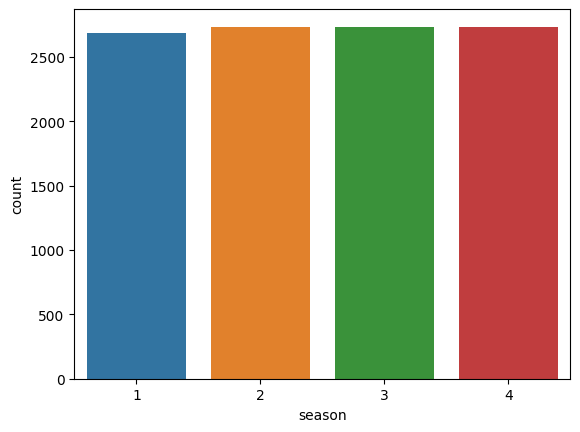

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


In [10]:
univ_ana(df,'season')

Observations:
1. There are 4 categories in the 'season' variable.
2. There are almost same number of records for all the four categories. 

##### holiday

There are 2 unique values in the holiday column.
They are [0 1]


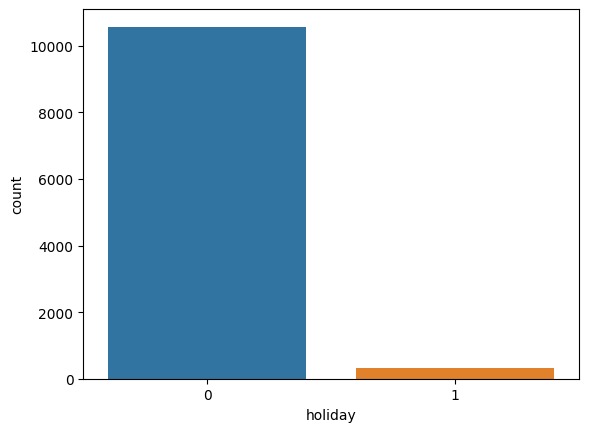

holiday
0    10575
1      311
Name: count, dtype: int64


In [11]:
univ_ana(df,'holiday')

Observations:
1. There are 2 categoried in the 'holiday' variable namely 0 and 1.
2. Most of the records in the dataset for holiday variable is 0.
3. The holiday variable is heavily imbalanced with 10575 records in holiday = 0(non-holiday) and 311 records in holiday = 1(holidays).

##### workingday

There are 2 unique values in the workingday column.
They are [0 1]


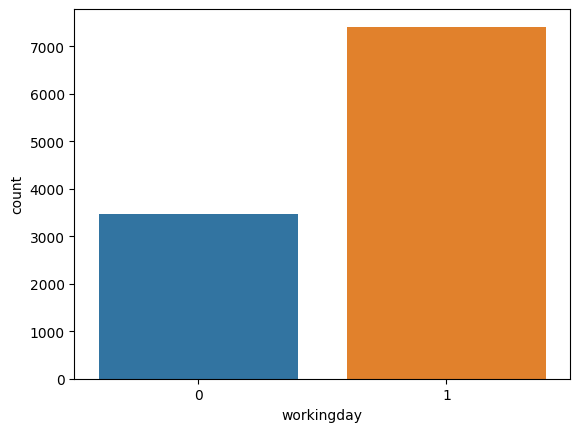

workingday
1    7412
0    3474
Name: count, dtype: int64


In [12]:
univ_ana(df,'workingday')

Observations:
1. There are 2 categories in the 'workingday' variable.
2. The workingday = 1 has the most number of records in the dataset followed by workingday = 0.

##### weather

There are 4 unique values in the weather column.
They are [1 2 3 4]


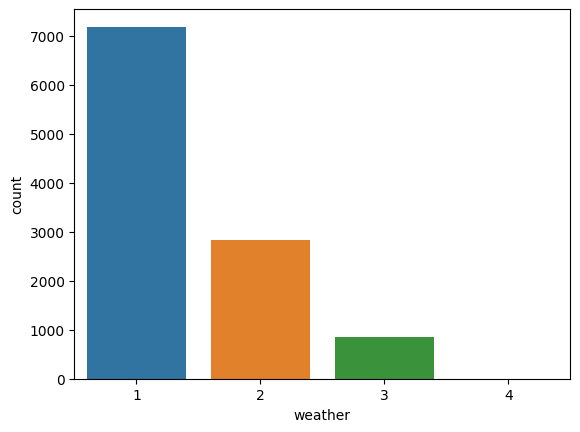

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [13]:
univ_ana(df,'weather')

Observations:
1. There are 4 categories in the 'weather' variable namely 1,2,3 and 4.
2. Top most weather category is 1 followed by 2 and 3.
3. The category 4 has only one record.

##### temp

There are 49 unique values in the temp column.


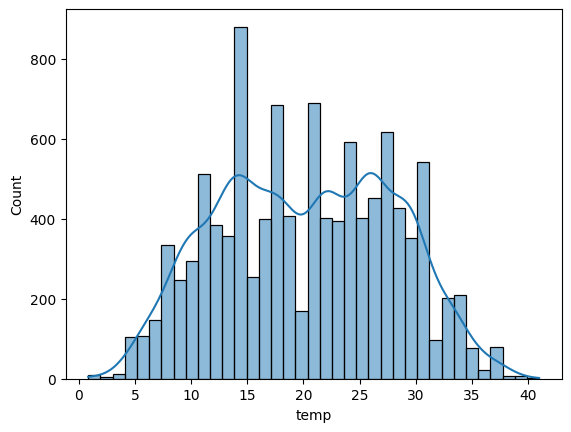

In [14]:
univ_ana(df,'temp')

Observations:
1. The 'temp' variable has 49 unique numerical values with multimodal distributions.

##### atemp

There are 60 unique values in the atemp column.


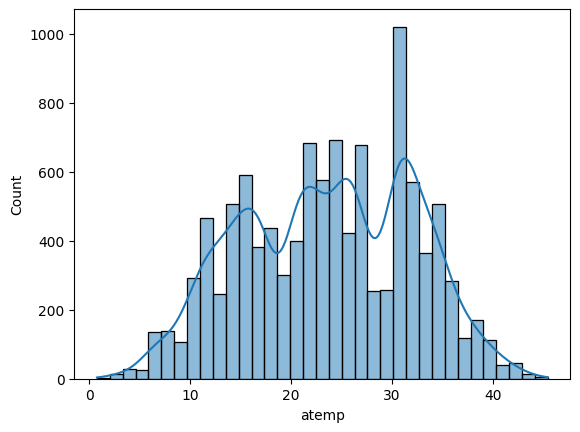

In [15]:
univ_ana(df,'atemp')

Observations:
1. The 'atemp' variable has 60 unique numerical values with multimodal distributions.

##### humidity

There are 89 unique values in the humidity column.


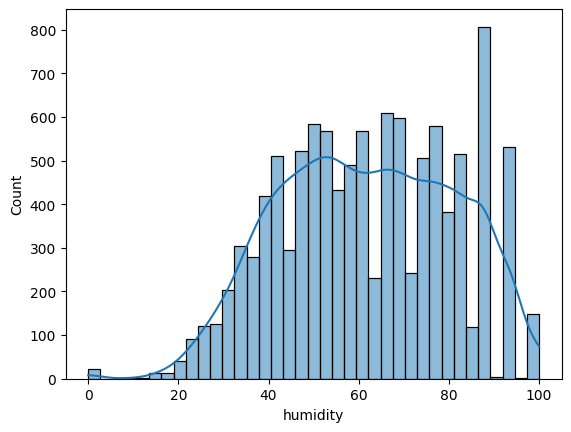

In [16]:
univ_ana(df,'humidity')

Observations:
1. The 'humidity' variable has 89 unique numerical values and they show a left skewed distribution.

##### windspeed

There are 28 unique values in the windspeed column.


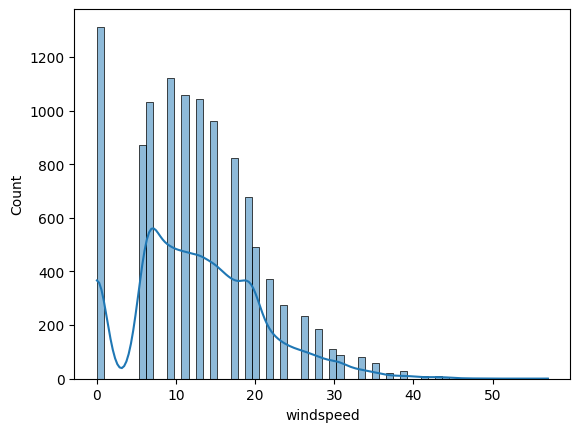

In [17]:
univ_ana(df,'windspeed')

Observations:
1. The 'windspeed' variable has 28 unique numerical values and have a right skewed distribution.

##### casual, registered and count

There are 309 unique values in the casual column.


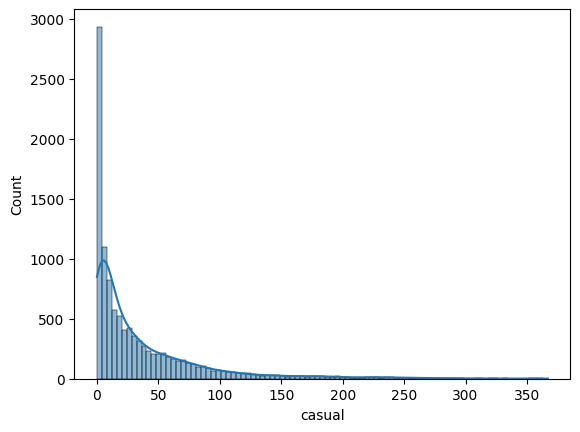

In [18]:
univ_ana(df,'casual')

There are 731 unique values in the registered column.


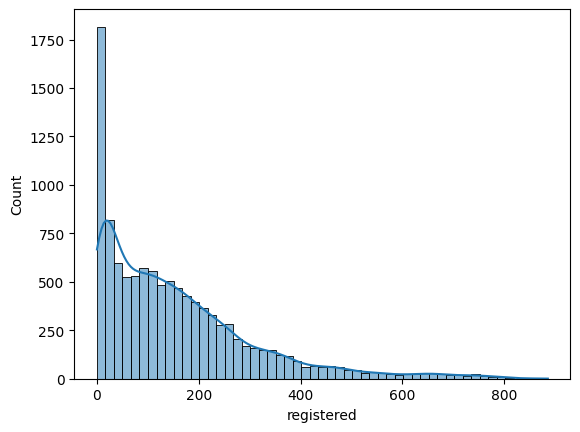

In [19]:
univ_ana(df,'registered')

There are 822 unique values in the count column.


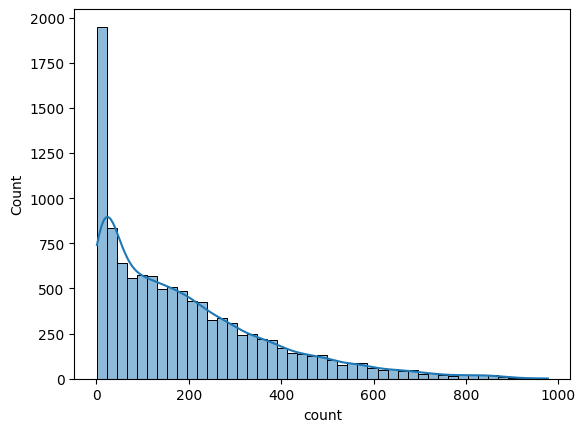

In [20]:
univ_ana(df,'count')

Observations:
1. The variables 'casual', 'registered' and 'count' are numerical variables with a right skewed distribution.

#### Splitting the datetime into year,month and day

In [21]:
#converting 'datetime' variable to 'datetime64[ns]' data type
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [22]:
#splitting the datetime into day, month and year
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day

df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')

df['year_month'] = df['year'] + "-" + df['month']

df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year month  day year_month  
0        81        0.0       3          13     16  2011     1    1     2011-1  
1        80        0.0       8          32     40  2011     1    1     2011-1  
2        80        0.0       5          27     32  2011     1    1     2011-1  
3        75        0.0       3          10     13  2011     1    1     2011-1  
4        75        0.0       0           1      1  2011     1    1     2011-1

In [23]:
print(df['year'].unique())
print(df['month'].unique())
print(df['day'].unique())

['2011' '2012']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Observations:
1. The dataset has data from years 2011 and 2012, months from Jan to Dec.
2. The dataset has data for only 1 to 19 days in each months. 

#### Correlations

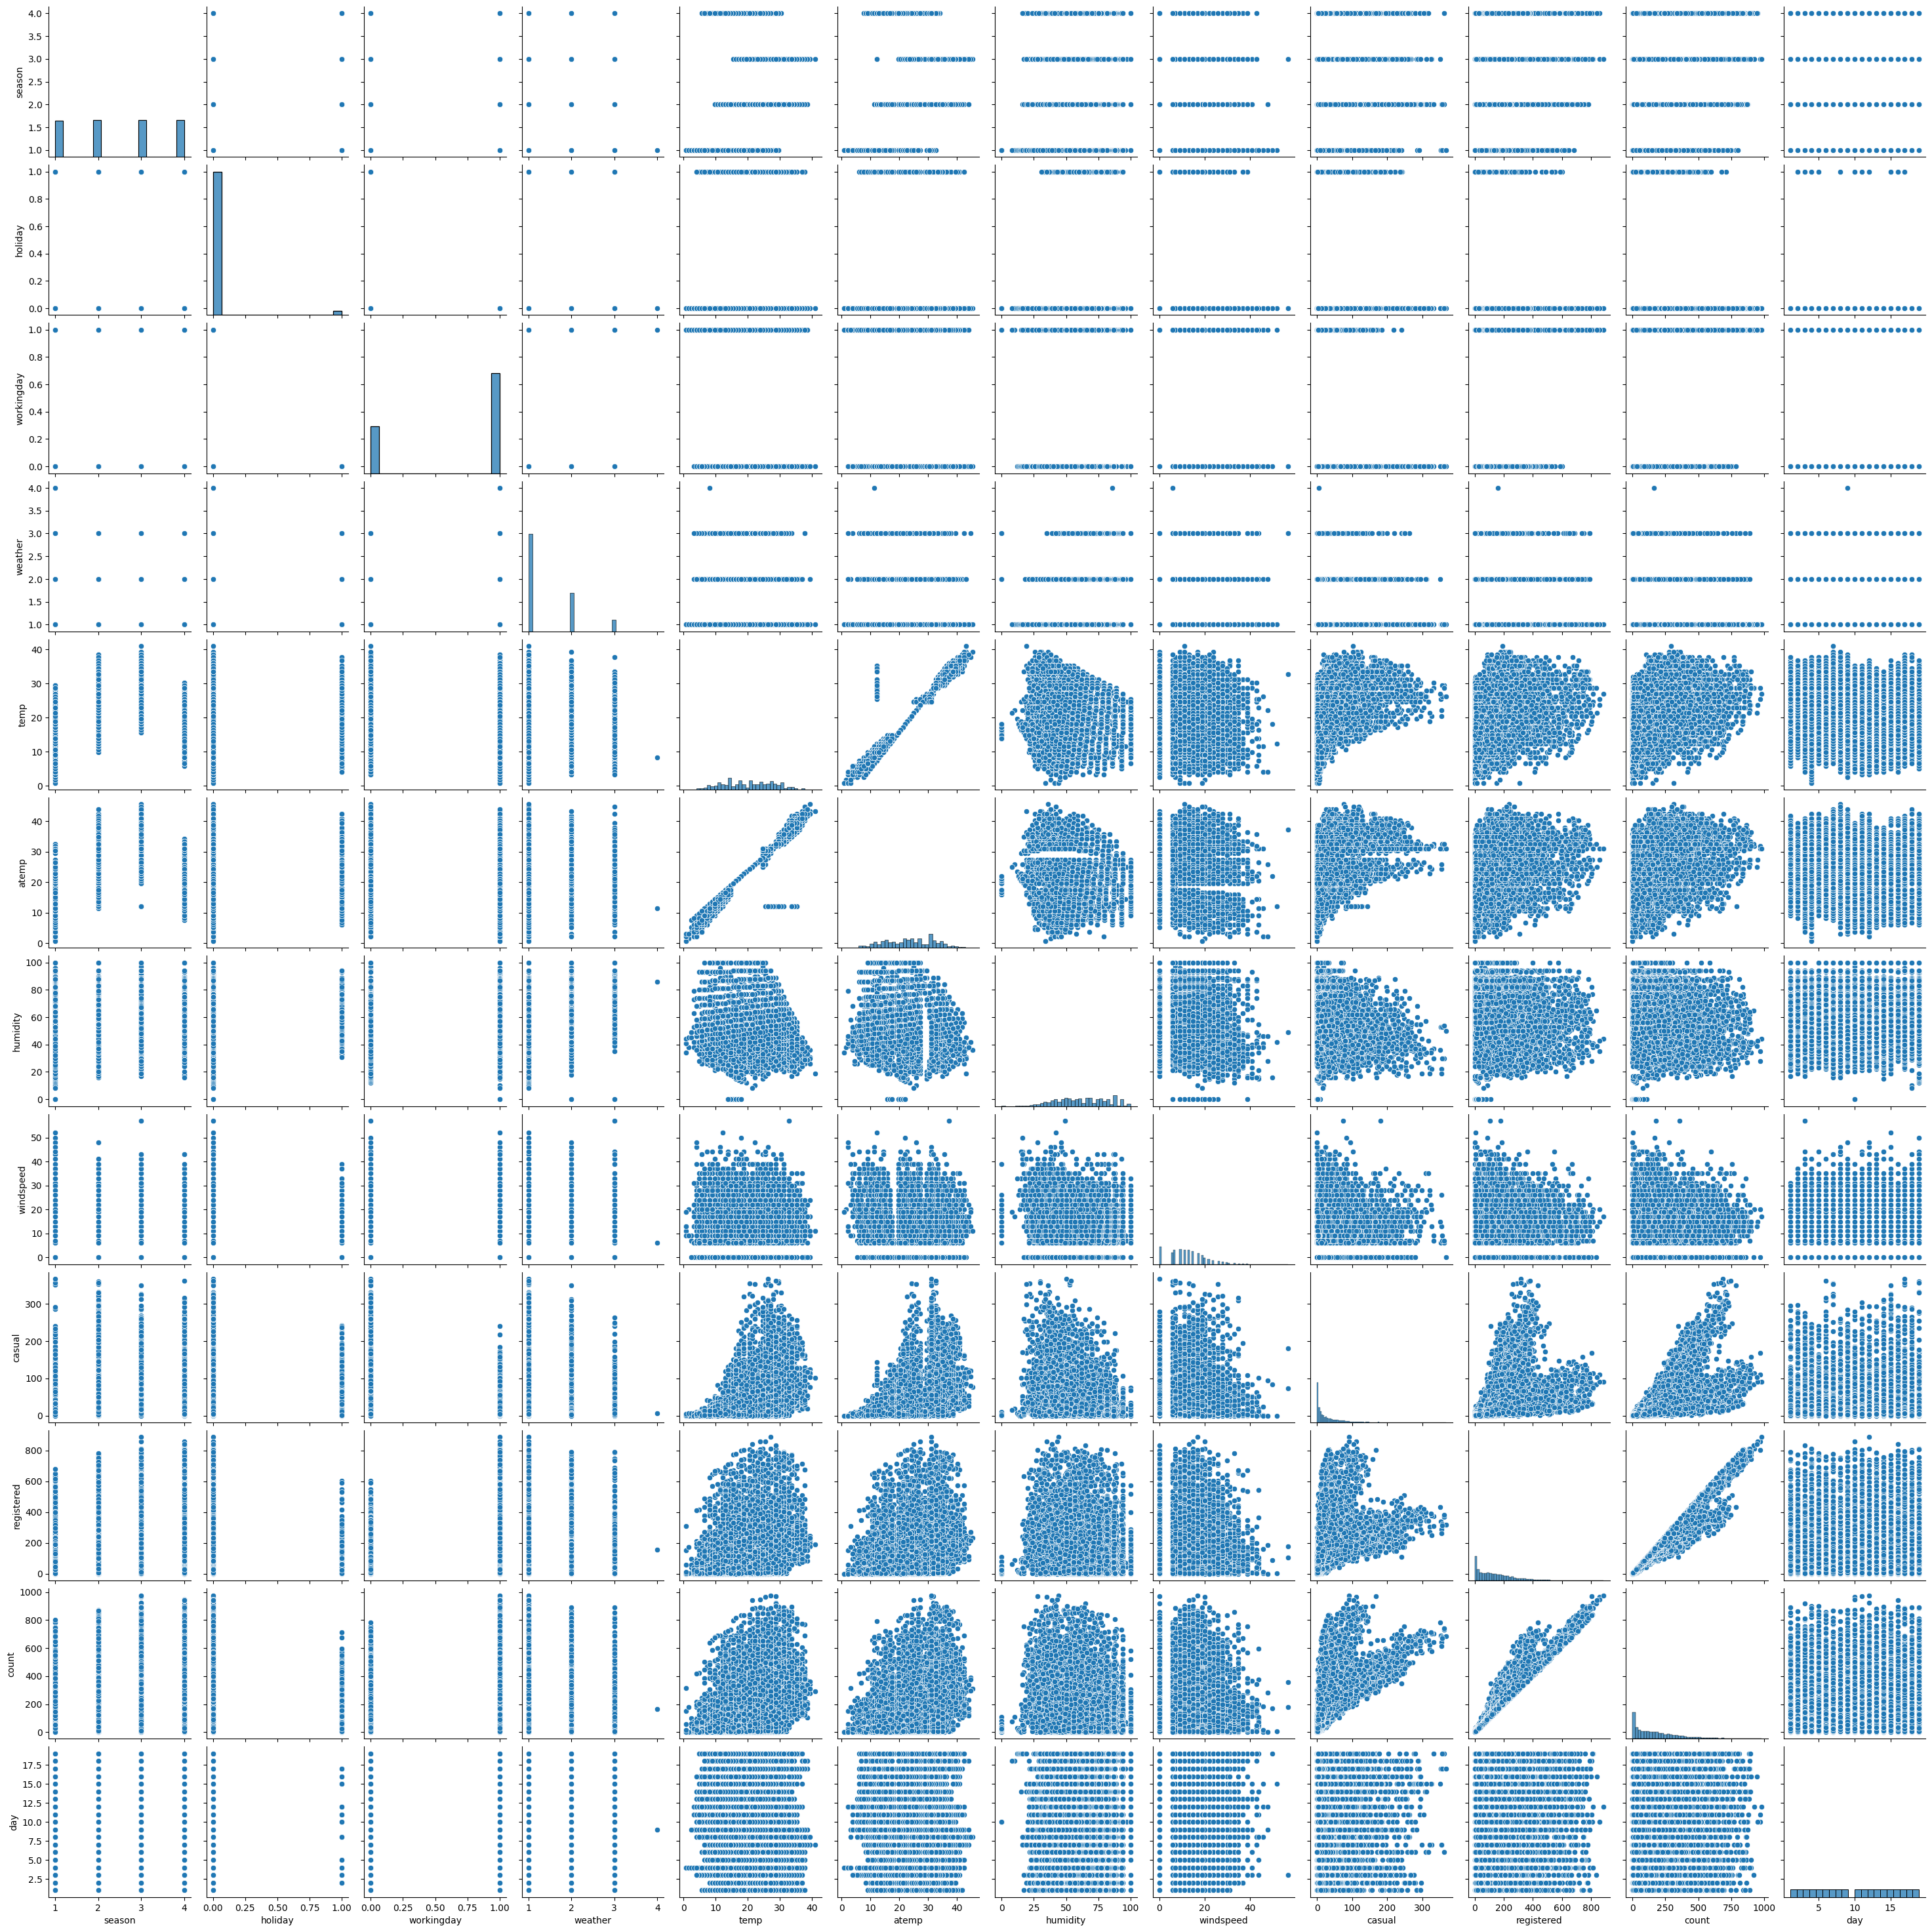

In [24]:
sns.pairplot(data = df)
plt.show()

Observations:
1. The 'count' variable appears to have positive correlations with 'registered', 'casual', 'temp', 'atemp', 'workingday' and 'season'.
2. The 'count' variable appears to have negative correlations with 'windspeed','weather', and 'holiday' variable.

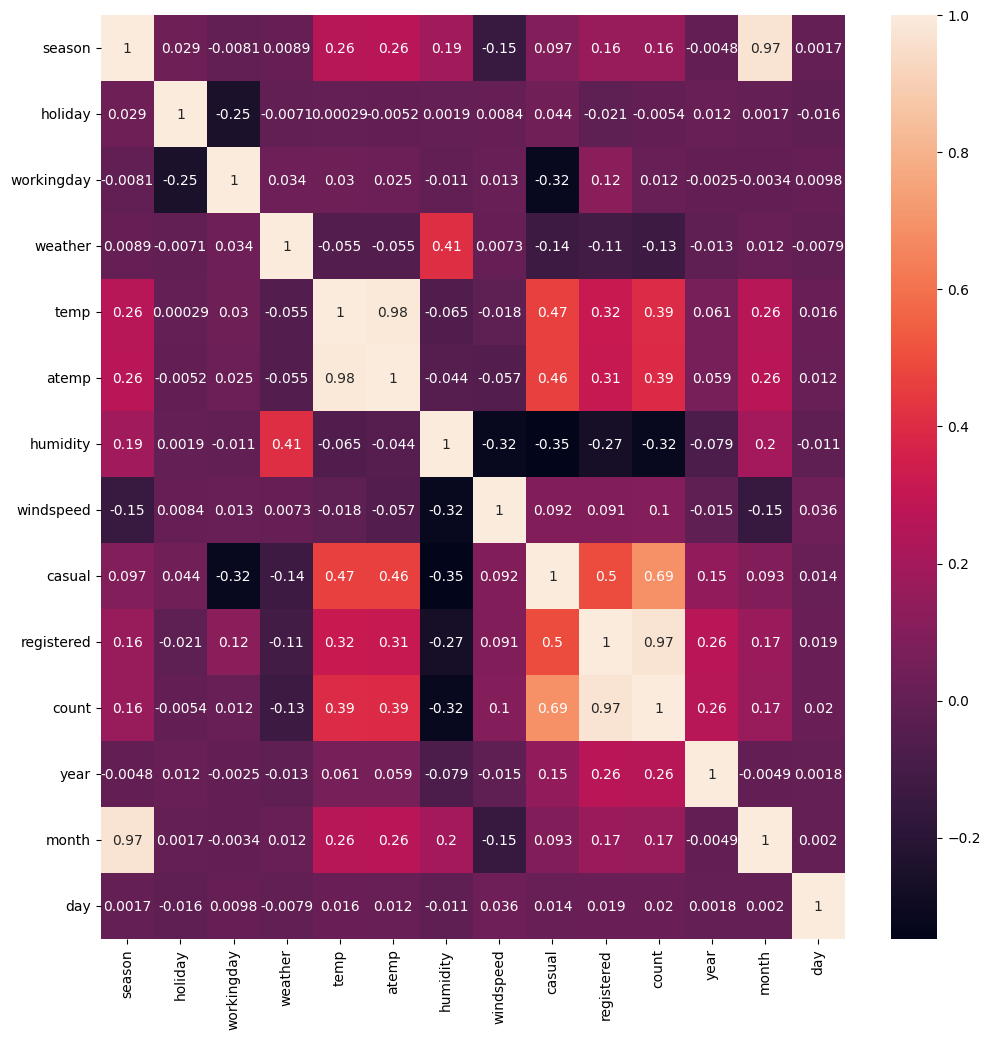

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap(df.drop(['datetime','year_month'], axis = 1).corr(), annot = True)
plt.show()

Observations:
1. The 'month' variable has a very strong correlation with the 'season' variable.
2. The 'count' variable has a very strong correlation with the 'registered' variable and followed by 'casual' variable.
3. The 'casual' variable has some correlation with the 'temp' and 'atemp' variables.
4. The 'windspeed' variable has some negative correlation with the 'humidity' variable.
5. The 'humidity' variable has some positive correlation with the 'weather' variable and has some negative correlation with the 'casual', 'windspeed' and the 'count' variable.
6. The 'atemp' variable has a very strong correlation with 'temp' followed by 'casual', 'count' and 'windspeed' variables.
7. 'temp' variable has positive correlation with 'casual', 'count' and 'registered'.
8. 'workingday' has negative correlation with 'casual' and 'holiday'.
9. 'day' variable does not have significant correlation with any other variables.

#### Bivariate Analysis

##### year_month vs count

In [26]:
df.groupby(['year_month'])[['count']].mean()

count
year_month            
2011-1       54.645012
2011-10     174.773626
2011-11     155.458333
2011-12     134.173246
2011-2       73.641256
2011-3       86.849776
2011-4      111.026374
2011-5      174.809211
2011-6      196.877193
2011-7      203.614035
2011-8      182.666667
2011-9      174.622517
2012-1      124.353201
2012-10     280.508772
2012-11     231.980220
2012-12     217.054825
2012-2      145.646154
2012-3      208.276923
2012-4      257.455947
2012-5      264.109649
2012-6      287.186404
2012-7      267.037281
2012-8      285.570175
2012-9      292.598684

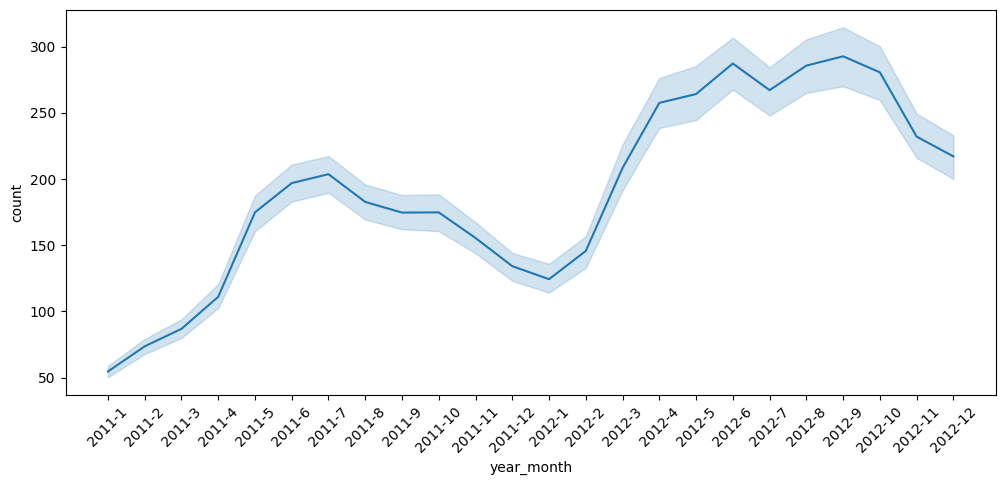

In [27]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = 'year_month', y = 'count')
plt.xticks(rotation = 45)
plt.show()

Observations:
1. We can see that the total number of bikes rented in 2012 is more than 2011.
2. January is the month with the least number of rentals in both years.
3. The peak of rentals in 2011 is in the month of July.
4. The peak of rentals in 201 is in the month of September and also in June.

##### year vs count

In [28]:
df.groupby(['year'])[['count']].mean()

count
year            
2011  144.223349
2012  238.560944

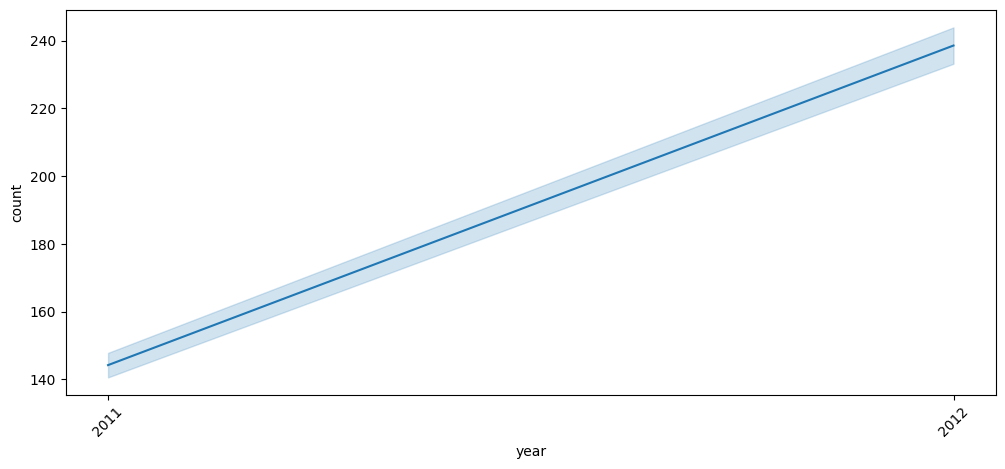

In [29]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = 'year', y = 'count')
plt.xticks(rotation = 45)
plt.show()

Observation:
1. The count seem to have increased in 2012 than 2011.

##### month vs count

In [30]:
df.groupby(['month'])[['count']].mean()

count
month            
1       90.366516
10     227.699232
11     193.677278
12     175.614035
2      110.003330
3      148.169811
4      184.160616
5      219.459430
6      242.031798
7      235.325658
8      234.118421
9      233.805281

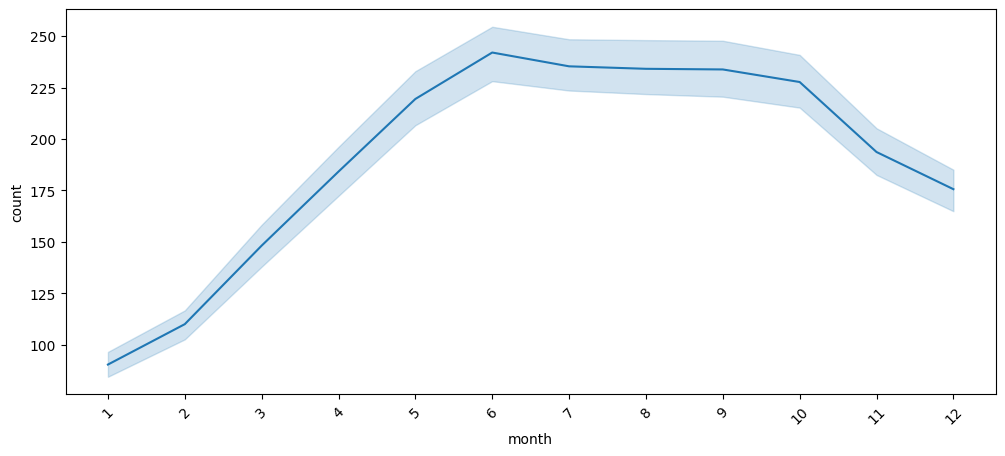

In [31]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = 'month', y = 'count')
plt.xticks(rotation = 45)
plt.show()

Observations:
1. The number of people renting bikes seem to be increasing steadily in the 1st half of the year (Jan to June).
2. After June the count started to decline and keeps declining till December.

##### day vs count

In [32]:
df.groupby(['day'])[['count']].mean()

count
day            
1    180.333913
2    183.910995
3    194.696335
4    195.705575
5    189.765217
6    189.860140
7    183.773519
8    179.041812
9    187.897391
10   195.183566
11   195.679577
12   190.675393
13   194.160279
14   195.829268
15   201.527875
16   191.353659
17   205.660870
18   192.605684
19   192.311847

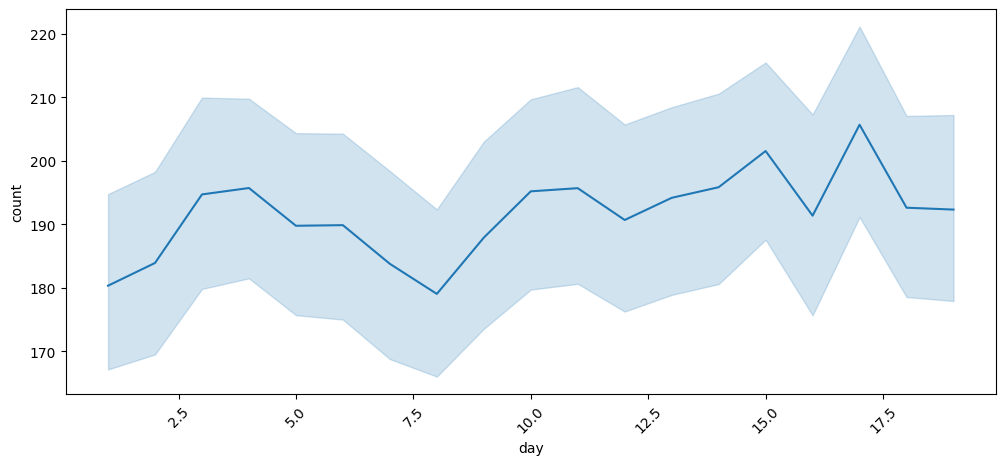

Minimum value in day variable: 1 | Maximum value in day variable: 19


In [33]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = 'day', y = 'count')
plt.xticks(rotation = 45)
plt.show()
print(f"Minimum value in day variable: {df['day'].min()} | Maximum value in day variable: {df['day'].max()}")

Observations:
1. The dataset does not contain all the days of the month. It only contains values from 1 to 19. It does not contain the last 10/11 days of each month.

In [34]:
def check_outliers(data,col, filter_by = None):
    """
    This function checks for outliers using IQR. It give the percentage of outliers in the data. Also plots boxplot.
    
    Input:
        data : Dataframe
        col: column in the dataframe to check the outliers for
        filter_by: column in the dataframe with which we will filter the data
                    default value: None.  --> If None, data is not filtered
                                          --> Else, data is filtered based on the categories in the variable.
    Output:
        No return value
    """
    #No filter
    if filter_by == None:
        
        #boxplot
        sns.boxplot(data = df, x = col)
        plt.show()
        
        #Calculating IQR
        q1 = data[[col]].quantile(0.25)[col]
        q3 = data[[col]].quantile(0.75)[col]
        iqr = q3 - q1
        lower_bound = q3  - (1.5 * iqr)
        upper_bound = q3  + (1.5 * iqr)
        
        #Finding the outliers
        l_outliers = data[data[col] < lower_bound]
        u_outliers = data[data[col] > upper_bound]
        lower_out_perc = l_outliers.shape[0]/data.shape[0]*100
        upper_out_perc = u_outliers.shape[0]/data.shape[0]*100
        outliers_percentage = 100 - (data.loc[(data[col] >= lower_bound) & (data[col] <= upper_bound)].shape[0]/data.shape[0]*100)
        
        #Finding the mid 50% data range
        mid_50_data = [np.percentile(data[col],25), np.percentile(data[col],75)]
        
        #calculating the Median
        median_col = data[col].median()
        
        #Printing the data
        print(f"For '{col}' feature:")
        print("-"*20)
        print(f"\tThe min value in {col} feature is {data[col].min()}")
        print(f"\tThe max value in {col} feature is {data[col].max()}")
        print(f"\tThe Median in {col} feature is {median_col}")
        print(f"\tThe IQR is {iqr}")
        print(f"\tThe middle 50 percent of data points are lying between {mid_50_data[0]} and {mid_50_data[1]}")
        print(f"\tThe lower bound for {col} feature is {lower_bound}")
        print(f"\tThe upper bound for {col} feature is {upper_bound}")
        print(f"\tThere are about {round(lower_out_perc,2)} % of outliers lesser than the lower bound value {lower_bound} in the {col} feature.")
        print(f"\tThere are about {round(upper_out_perc,2)} % of outliers greater than the upper bound value {upper_bound} in the {col} feature.")
        print(f"\tThe overall percentage of outliers in the {col} feature is {round(outliers_percentage,2)} %.")
    
    #Filtering data    
    else:
        
        #boxplot
        sns.boxplot(data = df, x = filter_by, y = col)
        plt.show()
        
        #Filtering the data based on each category in the variable
        for value in data[filter_by].unique():
            d = data[data[filter_by]==value][[col]]
            
            #calculation IQR
            q1 = d.quantile(0.25)[col]
            q3 = d.quantile(0.75)[col]
            iqr = q3 - q1
            
            #Find the outliers
            lower_bound = q3  - (1.5 * iqr)
            upper_bound = q3  + (1.5 * iqr)
            l_outliers = d.loc[d[col] < lower_bound]
            u_outliers = d.loc[d[col] > upper_bound]
            lower_out_perc = l_outliers.shape[0]/d.shape[0]*100
            upper_out_perc = u_outliers.shape[0]/d.shape[0]*100
            outliers_percentage = 100 - (d.loc[(d[col] >= lower_bound) & (d[col] <= upper_bound)].shape[0]/d.shape[0]*100)
            
            #Finding the mid 50% data range
            mid_50_data = [np.percentile(d[col],25), np.percentile(d[col],75)]
            
            #calculating the Median
            median_col = d[col].median()
            
            #Printing the data
            print(f"For {filter_by} = {value}:")
            print("-"*20)
            print(f"\tThe min value in '{col}' feature is {d[col].min()}")
            print(f"\tThe max value in '{col}' feature is {d[col].max()}")
            print(f"\tThe Median in {col} feature is {median_col}")
            print(f"\tThe IQR is {iqr}")
            print(f"\tThe middle 50 percent of data points are lying between {mid_50_data[0]} and {mid_50_data[1]}")
            print(f"\tThe lower bound for '{col}' feature is {lower_bound}")
            print(f"\tThe upper bound for '{col}' feature is {upper_bound}")
            print(f"\tThere are about {round(lower_out_perc,2)} % of outliers lesser than the lower bound value {lower_bound} in the {col} feature.")
            print(f"\tThere are about {round(upper_out_perc,2)} % of outliers greater than the upper bound value {upper_bound} in the {col} feature.")
            print(f"\tThe overall percentage of outliers in the '{col}' feature is {round(outliers_percentage,2)} %.")

##### count

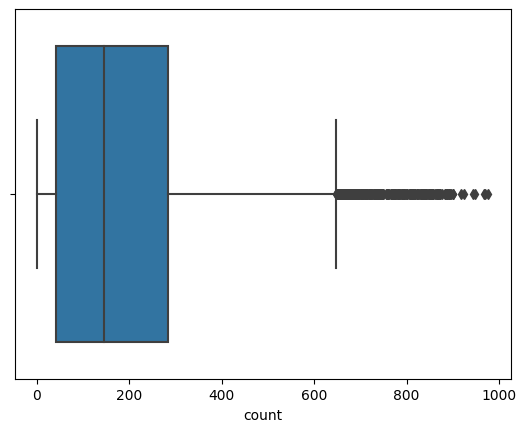

For 'count' feature:
--------------------
	The min value in count feature is 1
	The max value in count feature is 977
	The Median in count feature is 145.0
	The IQR is 242.0
	The middle 50 percent of data points are lying between 42.0 and 284.0
	The lower bound for count feature is -79.0
	The upper bound for count feature is 647.0
	There are about 0.0 % of outliers lesser than the lower bound value -79.0 in the count feature.
	There are about 2.76 % of outliers greater than the upper bound value 647.0 in the count feature.
	The overall percentage of outliers in the count feature is 2.76 %.


In [35]:
check_outliers(df,'count')

Observations:
1. There are 2.76% of outliers in the data.
2. The middle 50% of data lies between the value 42 and 284.
3. The median of 'count' variable is at 145.
4. The count values range from 1 to 977.

##### workingday vs count

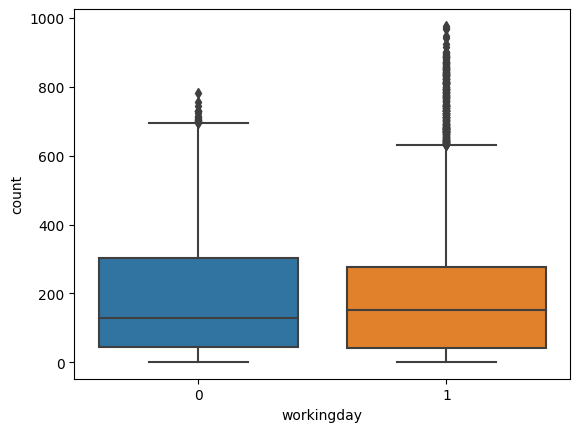

For workingday = 0:
--------------------
	The min value in 'count' feature is 1
	The max value in 'count' feature is 783
	The Median in count feature is 128.0
	The IQR is 260.0
	The middle 50 percent of data points are lying between 44.0 and 304.0
	The lower bound for 'count' feature is -86.0
	The upper bound for 'count' feature is 694.0
	There are about 0.0 % of outliers lesser than the lower bound value -86.0 in the count feature.
	There are about 0.46 % of outliers greater than the upper bound value 694.0 in the count feature.
	The overall percentage of outliers in the 'count' feature is 0.46 %.
For workingday = 1:
--------------------
	The min value in 'count' feature is 1
	The max value in 'count' feature is 977
	The Median in count feature is 151.0
	The IQR is 236.0
	The middle 50 percent of data points are lying between 41.0 and 277.0
	The lower bound for 'count' feature is -77.0
	The upper bound for 'count' feature is 631.0
	There are about 0.0 % of outliers lesser than the low

In [36]:
check_outliers(df,'count', filter_by = 'workingday')

Observations:
1. There are 0.46% of outliers in count variable with respect to workingday = 0 group. There are 3.75% of outliers in the count variable with respect to workignday = 1 group.
2. The median count value for workingday = 0 group is 128 and the median count value for workingday = 1 group is 151.
3. The middle 50% values of count variable for workingday = 0 group lies between 44 and 304. The middle 50% values of count variable for workingday = 1 group lies between 41 and 277.
4. The values in count variable ranges from 1 to 783 for workingday = 0 group and 1 to 977 for workingday = 1.

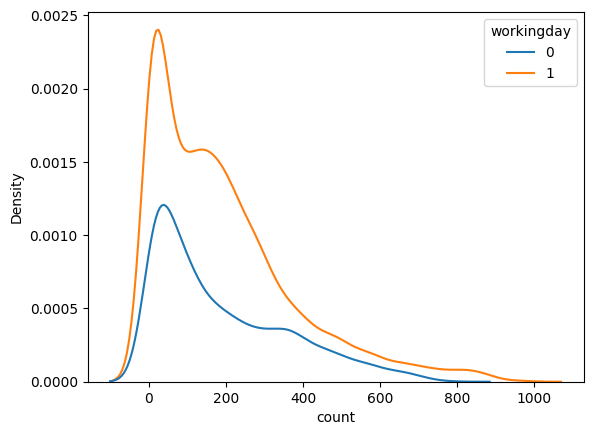

In [37]:
sns.kdeplot(data = df,x = 'count', hue = 'workingday')
plt.show()

Observations:
1. The distribution of 'count' variable for workingday = 0 and workingday = 1 groups are almost similar.
2. The probability of for the people renting bikes on working days(workingday = 1) is higher than people renting bikes on non-working days(workingday = 0).
3. The number of people renting bikes seem to be slightly higher on working days.

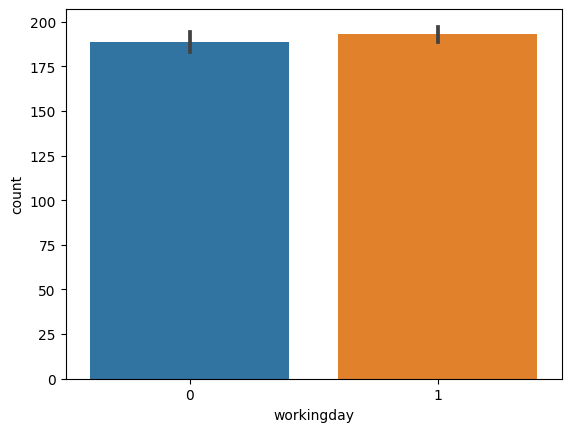

In [38]:
sns.barplot(data = df,x = 'workingday', y = 'count')
plt.show()

Observations:
1. The mean number of people renting during working days and non-working days seem to be pretty close to each other.
2. The confidence intervals of mean of the distribution of 'count' variable for working days and non-working days seem to overlap as per the barplot.

##### season vs count

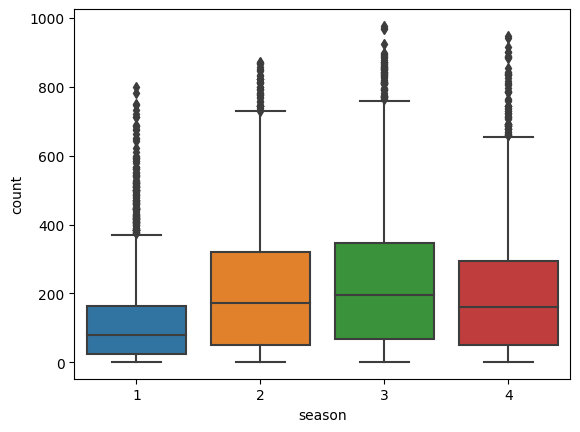

For season = 1:
--------------------
	The min value in 'count' feature is 1
	The max value in 'count' feature is 801
	The Median in count feature is 78.0
	The IQR is 140.0
	The middle 50 percent of data points are lying between 24.0 and 164.0
	The lower bound for 'count' feature is -46.0
	The upper bound for 'count' feature is 374.0
	There are about 0.0 % of outliers lesser than the lower bound value -46.0 in the count feature.
	There are about 5.17 % of outliers greater than the upper bound value 374.0 in the count feature.
	The overall percentage of outliers in the 'count' feature is 5.17 %.
For season = 2:
--------------------
	The min value in 'count' feature is 1
	The max value in 'count' feature is 873
	The Median in count feature is 172.0
	The IQR is 272.0
	The middle 50 percent of data points are lying between 49.0 and 321.0
	The lower bound for 'count' feature is -87.0
	The upper bound for 'count' feature is 729.0
	There are about 0.0 % of outliers lesser than the lower bound 

In [39]:
check_outliers(df, 'count','season')

Observations:
1. There are 5.17% of outliers in count variable with respect to season = 1 group. There are 1.54% of outliers in the count variable with respect to season = 2 group.There are 2.23% of outliers in count variable with respect to season = 3 group. There are 2.34% of outliers in the count variable with respect to season = 4 group
2. The median count value for season = 1 group is 78 and the median count value for season = 2 group is 172.The median count value for season = 3 group is 195 and the median count value for season = 14 group is 161.
3. The middle 50% values of count variable for season = 1 group lies between 24 and 164. The middle 50% values of count variable for season = 2 group lies between 49 and 321. The middle 50% values of count variable for season = 3 group lies between 68 and 347. The middle 50% values of count variable for season = 4 group lies between 51 and 294.
4. The values in count variable ranges from 1 to 801 for season = 1 group and 1 to 873 for season = 2.The values in count variable ranges from 1 to 997 for season = 3 group and 1 to 948 for season = 4.

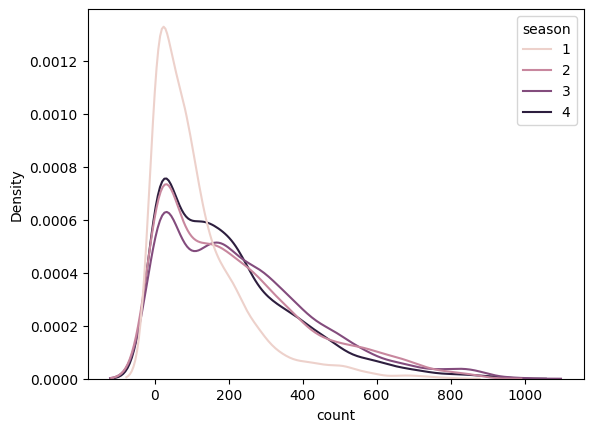

In [40]:
sns.kdeplot(data = df,x = 'count', hue = 'season')
plt.show()

Observations:
1. The distributions for 'count' varable for seasons 1, 2, 3 and 4 are right skewed.
2. The variance in the distribution of 'count' variable for season = 1 is lesser than the variance in the distribution of 'count' variables for seasons 2, 3 and 4.
3. The likelihood of less number of people renting bikes in season = 1 seem to be higher than the other seasons.
3. The likelihood of more number of people renting bikes is higher in season = 3 than the other seasons.

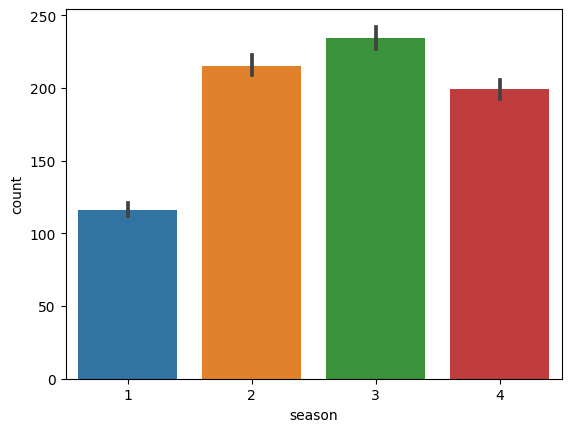

In [41]:
sns.barplot(data = df,x = 'season', y = 'count')
plt.show()

Observations:
1. Season 3 has the highest average number of rentals followed by season 2, 4 and finally 1.
2. The average numner of rentals in Seasons 3, 2, 4 are closer than season 1.

##### weather vs count

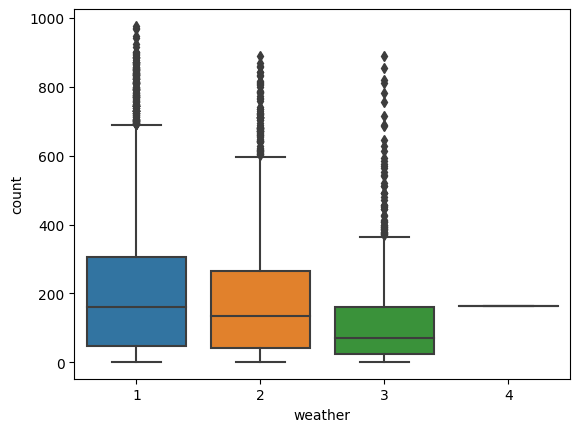

For weather = 1:
--------------------
	The min value in 'count' feature is 1
	The max value in 'count' feature is 977
	The Median in count feature is 161.0
	The IQR is 257.0
	The middle 50 percent of data points are lying between 48.0 and 305.0
	The lower bound for 'count' feature is -80.5
	The upper bound for 'count' feature is 690.5
	There are about 0.0 % of outliers lesser than the lower bound value -80.5 in the count feature.
	There are about 2.22 % of outliers greater than the upper bound value 690.5 in the count feature.
	The overall percentage of outliers in the 'count' feature is 2.22 %.
For weather = 2:
--------------------
	The min value in 'count' feature is 1
	The max value in 'count' feature is 890
	The Median in count feature is 134.0
	The IQR is 223.0
	The middle 50 percent of data points are lying between 41.0 and 264.0
	The lower bound for 'count' feature is -70.5
	The upper bound for 'count' feature is 598.5
	There are about 0.0 % of outliers lesser than the lower bou

In [42]:
check_outliers(df, 'count','weather')

Observations:
1. There are 2.22% of outliers in count variable with respect to weather = 1 group. There are 2.22% of outliers in the count variable with respect to weather = 2 group.There are 6.52% of outliers in count variable with respect to weather = 3 group. There are 0% of outliers in the count variable with respect to weather = 4 group.
2. The median count value for weather = 1 group is 161 and the median count value for weather = 2 group is 134.The median count value for weather = 3 group is 71 and the median count value for weather = 14 group is 164.
3. The middle 50% values of count variable for weather = 1 group lies between 48 and 305. The middle 50% values of count variable for weather = 2 group lies between 41 and 264. The middle 50% values of count variable for weather = 3 group lies between 23 and 161. The middle 50% values of count variable for weather = 4 group lies between 164 and 164.
4. The values in count variable ranges from 1 to 977 for weather = 1 group and 1 to 890 for weather = 2.The values in count variable ranges from 1 to 891 for weather = 3 group and 164 for weather = 4.
5. weather 4 group has only one datapoint.

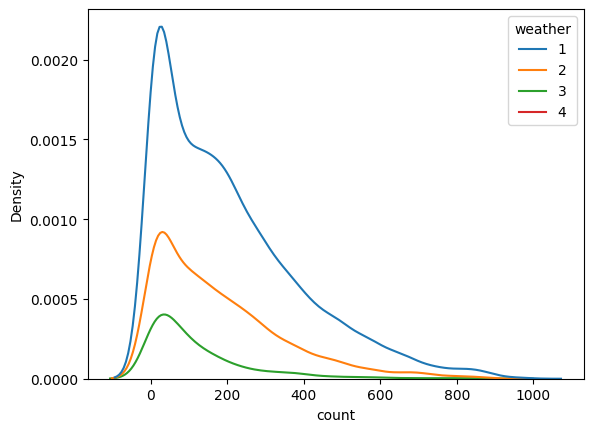

In [126]:
sns.kdeplot(data = df,x = 'count', hue = 'weather')
plt.show()

Observations:
1. The distributions for 'count' varable for seasons 1, 2 and 3 are right skewed.
2. The variance in the distribution of 'count' variable for weather = 3 is lesser than the variance in the distribution of 'count' variables for weather 1 and 2.
3. The likelihood of less number of people renting bikes with weather = 1 seem to be higher than the other weathers.
4. The likelihood of more number of people renting bikes is higher in weather = 1 than the other weather.

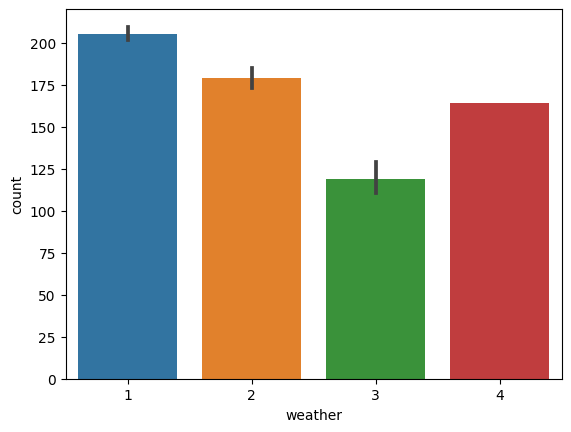

In [44]:
sns.barplot(data = df,x = 'weather', y = 'count')
plt.show()

Observations:
1. The highest average number of bikes rented is in weather 1 followed by weather 2 and 3. Since there is only one datapoint for weather 4, there is no confidence interval shown.

##### weather vs season

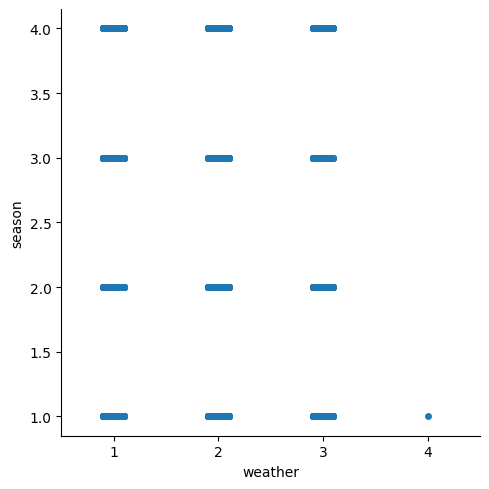

In [45]:
sns.catplot(data=df, x="weather", y="season")
plt.show()

Observations:
1. It is observed that the season 1,2,3 and 4 have weather types 1,2 and 3. However, only the season 1 has the weather type 4.

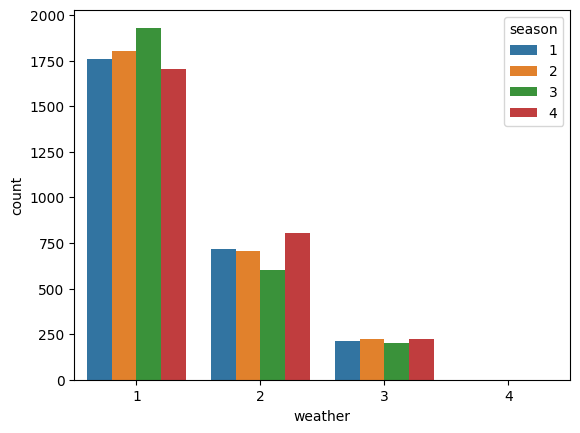

In [46]:
sns.countplot(data=df, x="weather", hue = 'season')
plt.show()

Observations:
1. The weather type 1 is mostly occuring in season 3 followed by season 2, 1 and 4.
2. The weather type 2 is mostly occuring in season 4 followed by 1, 2 and 3.
3. The weather type 3 is mostly occuring in season 2 followed by 4, 1 and 3.

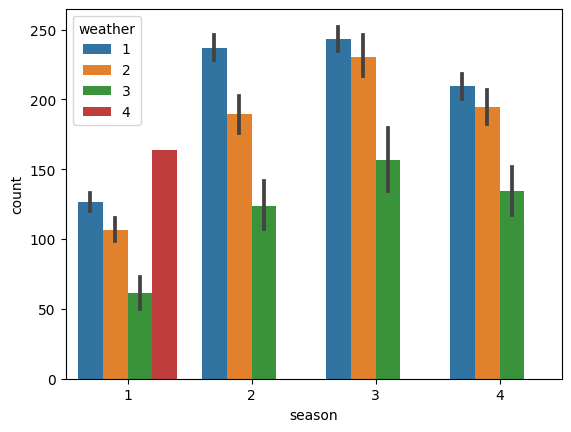

In [47]:
#weather vs season with respect to count
sns.barplot(data=df, x="season",y = 'count', hue = 'weather')
plt.show()

Observations:
1. Season 1 has all types of weathers(1,2,3 and 4). The highest average number of rentals season 1 is when the weather type is 1 followed by when the weather is 2 and 3. The weather type 4 occured only once but that has the highest number of rentals in season 1.
2. The highest average number of rentals season 2 is when the weather type is 1 followed by when the weather is 2 and 3.
3. The highest average number of rentals season 3 is when the weather type is 1 followed by when the weather is 2 and 3.
4. The highest average number of rentals season 4 is when the weather type is 1 followed by when the weather is 2 and 3.
5. People seem to like the combination of season 3 with weather type 1 and season 2 with weather type 1 the most which has the most highest and second highest average number of rentals.
6. The third highest average number of rentals are for the combination of season 3 and weather type 2 followed by season 4 and weather type 1.
7. Seasons 2, 3 and 4 with combination of weather 1 and 2 seem to be the most favorite for bike rentals.

##### month vs holiday

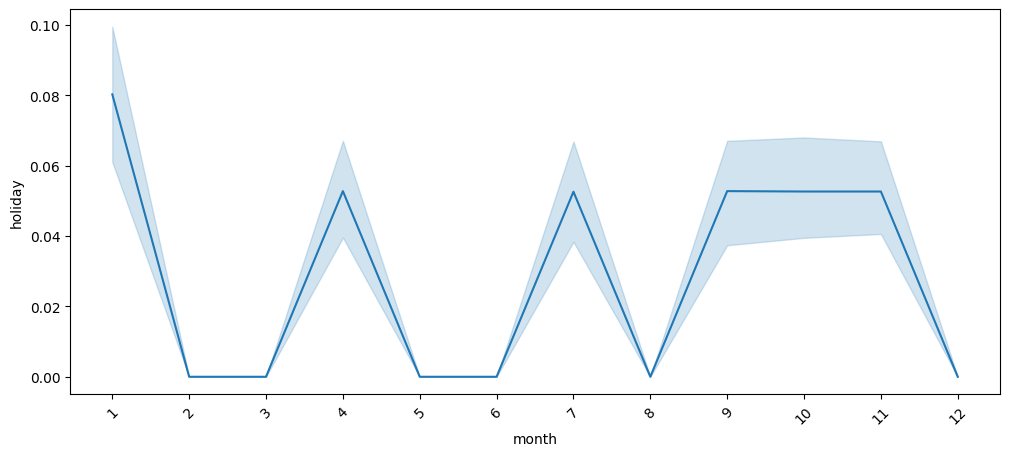

In [48]:
plt.figure(figsize = (12,5))
sns.lineplot(data = df, x = 'month', y = 'holiday')
plt.xticks(rotation = 45)
plt.show()

Observations:
1. The month of Jan seems to have the highest average number of holidays. About 8% of the month are holidays
2. The average number of holidays for the months april, july,sept, oct and nov are similar. About 5% of the days are holidays in these months.
3. There are no holidays in the months of Feb, Mar, May, June, Aug and Dec.

#### Converting to categorical data type

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  object        
 13  month       10886 non-null  object        
 14  day         10886 non-null  int32         
 15  year_month  10886 non-null  object        
dtypes: datetime64[ns](1), 

In [50]:
catcols = ['holiday','season','workingday','weather','year_month','year','month','day']
df[catcols] = df[catcols].astype('category')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  category      
 15  year_month  10886 non-null  category      
dtypes: category(8), dateti

#### Hypothesis Testing

##### Coding the hypothesis tests

###### 2 Sample T - Test code

In [95]:
def ttest_hyp(data, int_col, cat_col, u_cats, alter, mean0 ,mean1, alpha):
    """
    This function performs the 2 Sample T-test. It prints the Null and Alternate Hypothesis assumptions. 
    Checks the difference between the variances of the 2 samples.
    Prints the hypothesis testing results.
    It utilizes the scipy library to calculate the T-test for the means of two independent samples of scores.
    It performs the Standard 2 Sample t-test if the variance of the 2 groups in the categorical variable are 
    similar or under the ratio 1:4.
    It performs the Welch's t-test if the difference in the variance of the 2 groups in the categorical variable
    are more than the ratio 1:4
    
    Input:
        data : Pandas Dataframe
        int_col : The numerical column of the Dataframe
        cat_col : The categorical column of the Dataframe
        u_cats : unique values in the categorical column
        alter : 'less','greater','two-sided' depending on the type of tail we are testing.
        mean0 : mean value of group 1
        mean1 : mean value of group 2
        alpha : significance level for the test
    Output:
        No return value
    """
    print("\n2 Sample T Test of independence")
    print("-"*33)
    
    #calculating variances of the 2 samples
    varn = []
    for value in u_cats:
        var = np.var(data[data[cat_col] == value][int_col])
        varn.append(var)
        print(f"Variance of '{int_col}' variable for {cat_col} = {value} is: {var}")
    
    #Defining the Null Hypothesis
    print(f"    Null Hypothesis: The mean of '{int_col}' variable for {cat_col} = {u_cats[0]} is equal to the mean of {int_col} for {cat_col} = {u_cats[1]}.")
    
    #Defining Alternative hyporthesis based on the means of the two samples 
    if mean0 > mean1:
        alter = 'greater'
        print(f"    Alternative Hypothesis: The mean of {int_col} for {cat_col} = {u_cats[0]} is greater than the mean of {int_col} for {cat_col} = {u_cats[1]}.")
    elif mean1 > mean0:
        alter = 'less'
        print(f"    Alternative Hypothesis: The mean of {int_col} for {cat_col} = {u_cats[0]} is lesser than the mean of {int_col} for {cat_col} = {u_cats[1]}.")
    
    #Determining the type of t-test based on the variances of the 2 samples.
    if varn[0] > varn[1]:
        big = varn[0]
        small = varn[1]
    elif varn[1] > varn[0]:
        big = varn[1]
        small = varn[0]
    else:
        big = varn[0]
        small = varn[1]
    
    #performing Welch's t-test if difference of variance is more than 1:4 ratio
    if small / big < 0.25:
        print(f"\n The variance of the two groups are more than 1:4 ratio. Hence using Welch’s t-test")
        t_stat, p_value = ttest_ind(data[data[cat_col] == u_cats[0]][int_col], data[data[cat_col] == u_cats[1]][int_col], alternative = alter, equal_var = False)
    
    #performing Standard t-test if difference of variance is more than 1:4 ratio
    else:
        print(f"\n The variance of the two groups are less than 1:4 ratio. Hence using standard independent 2 sample test")
        t_stat, p_value = ttest_ind(data[data[cat_col] == u_cats[0]][int_col], data[data[cat_col] == u_cats[1]][int_col], alternative = alter)
    
    print(f"\tT-Statistic: {t_stat}\n\tp_value: {p_value}")
    
    #Checking the p-value against alpha to determine the result      
    if p_value < alpha:
        print("    Conclusion:\n\tReject H0.")
        if alter == 'less':
            print(f"\tThe mean of '{int_col}' variable for {cat_col} = {u_cats[0]} is lesser than the mean of {int_col} for {cat_col} = {u_cats[1]}.")
            print(f"\tThe {cat_col} variable impacts the {int_col} variable.")
        elif alter == 'greater':
            print(f"\tThe mean of '{int_col}' variable for {cat_col} = {u_cats[0]} is greater than the mean of {int_col} for {cat_col} = {u_cats[1]}.")
            print(f"\tThe {cat_col} variable impacts the {int_col} variable.")
    else:
        print("    Conclusion:\n\tFailed to reject H0")
        print(f"\tThe mean of '{int_col}' variable for {cat_col} = {u_cats[0]} and the mean of {int_col} for {cat_col} = {u_cats[1]} are equal.")
        print(f"\tThe {cat_col} variable does not impact the {int_col} variable.")

###### Shapiro Wilk Test code

In [69]:
def shapiro_test(data,int_col,cat_col,u_cats, alpha):
    """
    This function performs the Shapiro Wilk's test for Normality. It prints the Null and Alternate Hypothesis assumptions. 
    It checks if each groups within the categorical variable with respect to the numerical variable are normally distributed.
    Prints the hypothesis testing results.
    It utilizes the scipy library to perform the Shapiro test for Normality.
    
    Input:
        data : Pandas Dataframe
        int_col : The numerical column of the Dataframe
        cat_col : The categorical column of the Dataframe
        u_cats : unique values in the categorical column
        alpha : significance level for the test
    Output:
        res : list. 
            Returns the tests that can be conducted based on the Normality test. ['anova']/ ['kruskal', 'anova']
    """
    print("Performing Shapiro Wilk Test for Normality.")
    print("-"*50)
    print("H0: The variable has a Normal distribution")
    print("Ha: The variable does not have a Normal distribution")
    res = []
    
    #Performing Shapiro test for Normality for each group within the categorical variable
    for value in u_cats:
        print(f"\tTest of Normality on {int_col} variable for sample with {cat_col} = {value}",end = '-->')
        shapiro_stat, shapiro_p_value = shapiro(data[data[cat_col] == value][int_col])
        print(f"Shapiro test p value: {shapiro_p_value} ")
        print("\tConclusion:",end = ' ')
        
        #Concluding the test result
        if shapiro_p_value < alpha:
            print(" Reject H0")
            print("\t    We have evidence to say that the variable does not have a normal distribution.")
            res = ['kruskal', 'anova']
            #returns if even one of the sample group is not normally distributed
            return res
        else:
            print(" Failed to reject H0")
            print("\t    No significant evidence to say that the variable does not have a normal distribution.")
            res = ['anova']
    return res

###### Levene Test code

In [70]:
def levene_test(data, cat_col, int_col, u_cats, alpha):
    """
    This function performs the Levene test to check the variance between the groups. 
    It prints the Null and Alternate Hypothesis assumptions. 
    It checks if each groups within the categorical variable with respect to the numerical variable have similar variances.
    Prints the hypothesis testing results.
    It utilizes the scipy library to perform the Levene test.
    
    Input:
        data : Pandas Dataframe
        int_col : The numerical column of the Dataframe
        cat_col : The categorical column of the Dataframe
        u_cats : unique values in the categorical column
        alpha : significance level for the test
    Output:
        res : list. 
            Returns the tests that can be conducted based on the variance equality test. ['anova']/ ['kruskal', 'anova']
    """
    print("Performing Levene Test to check variance.")
    print("-"*50)
    print("H0: The variance between the groups within the distribution are equal.")
    print("Ha: The variance between the groups within the distribution are different.")
    print(f"checking variance in the {int_col} variable for groups in {cat_col}.",end ='-->')
    group_list = []
    res = []
    
    #getting sample groups
    for value in u_cats:
        group_list.append(data[data[cat_col] == value][int_col])
    
    #performing Levene test on the sample groups
    l_stat, l_p_value = levene(*group_list)
    print(f"Levene Test p_value: {l_p_value}.")
    print("\tConclusion:",end = ' ')
    
    #Conclusions
    if l_p_value < alpha:
        print(" Reject H0")
        print("\t    We have evidence to say that variance between the groups within the distribution are NOT equal.")
        res = ['kruskal', 'anova']
    else:
        print(" Failed to reject H0")
        print("\t    No significant evidence to say that variance between the groups within the distribution are different.")
        res = ['anova']
    return res

###### ANOVA Test code

In [71]:
def anova(group_list, alpha):
    """
    This function performs the ANOVA test to check if the sample groups have the same population mean.
    It prints the Null and Alternate Hypothesis assumptions. 
    Prints the hypothesis testing results.
    It utilizes the f_oneway from scipy library to perform the ANOVA test.
    
    Input:
        group_list : sample groups
        alpha : significance level for the test
    Output:
        No return value
    """
    print("\nPerforming ANOVA 'analysis of variance'.")
    print("-"*50)
    
    #Hypothesis assumptions
    print("H0: μ1 = μ2 = μ3 = … = μk. The means of all the groups are equal.")
    print("Ha: There is at least one group mean that differs from the rest.")
    
    #perform the ANOVA test
    f_stat, f_p_value = f_oneway(*group_list)
    if f_p_value < alpha:
        print(f"Conclution: Reject H0. P value: {f_p_value}")
        print("We can say that there is significant evidence that one of the group means are different from the rest in the variable.")
    else:
        print(f"Conclution: Failed to reject H0. P value: {f_p_value}")
        print("There is not enough evidence to prove that at least one of the means of the groups are different from the rest.")

###### Kruskal Test code

In [103]:
def krushkal_Test(group_list,alpha):
    """
    This function performs the Kruskal test which is the non-parametric alternative of ANOVA test 
    to check if the sample groups have the same population mean.
    This test is performed if the pre-requisites for the ANOVA test fails.
    It prints the Null and Alternate Hypothesis assumptions. 
    Prints the hypothesis testing results.
    It utilizes the kruskal from scipy library.
    
    Input:
        group_list : sample groups
        alpha : significance level for the test
    Output:
        No return value
    """
    print("\nPerforming Kruskal test.")
    print("-"*50)
    
    #defining the Null and Alternative Hypothesis
    print("H0: The population median of all of the groups are equal.")
    print("Ha: There is at least one group median that differs from the rest.")
    
    #Performing the Kruskal test
    k_stat, k_p_value = kruskal(*group_list)
    if k_p_value < alpha:
        print(f"Conclution: Reject H0. P value: {k_p_value}")
        print("We can say that there is significant evidence that one of the group medians are different from the rest in the variable.")
    else:
        print(f"Conclution: Failed to reject H0. P value: {k_p_value}")
        print("There is not enough evidence to prove that at least one of the medians of the groups are different from the rest.")

###### Correlation Test code

In [73]:
def corr_test(data, col1, col2, alpha):
    """
    This function performs the Correlation test using the Spearman Rank correlation test
    to check if the two samples are correlated to each other.
    It prints the Null and Alternate Hypothesis assumptions. 
    Prints the hypothesis testing results.
    It utilizes the spearmanr from scipy library to perform the Correlation test.
    
    Input:
        data : Pandas Dataframe
        col1 : column from the Dataframe
        col2 : column from the Dataframe
        alpha : significance level for the test
    Output:
        No return value
    """
    print("\nPerforming Spearmanr test of Correlation.")
    print("-"*50)
    
    #Defining the Null and Alternative Hypothesis
    print("H0: There is no correlation between the two variables.")
    print("Ha: There is correlation between the two variables.")
    
    #Performing the Spearman Rank test for correlation
    corr_stat, corr_p_value = spearmanr(data[col1], data[col2])
    
    #Concluding the results
    if corr_p_value < alpha:
        print(f"Conclution: Reject H0. P value: {corr_p_value}")
        print("We can say that there is significant evidence that the two variables are correlated.")
    else:
        print(f"Conclution: Failed to reject H0. P value: {corr_p_value}")
        print("There is not enough evidence to prove that the two variables are correlated.")

###### Chi Square Test code

In [74]:
def chi2_test(df_crosstab, alpha):
    """
    This function performs the Chi square contingency test between two categorical variable to test the independence.
    It prints the Null and Alternate Hypothesis assumptions. 
    Prints the hypothesis testing results.
    It utilizes the chi2_contingency from scipy library to test the independence.
    
    Input:
        df_crosstab : Frequency table of the two variables (pandas crosstab dataframe)
        alpha : significance level for the test
    Output:
        No return value
    """
    print("\nPerforming Chi Square test of Independence.")
    print("-"*50)
    
    #Defining the Null and Alternative hypothesis
    print("H0: The two variables are independent (i.e. no relationship or correlation)")
    print("Ha: the two variables are related.")
    
    #Performing the chi square contingency test
    _, c_p_value, _, _ = chi2_contingency(df_crosstab)
    
    #Concluding the results
    if c_p_value < alpha:
        print(f"Conclution: Reject H0. P value: {c_p_value}")
        print("We can say that there is significant evidence that the two variables are related.")
    else:
        print(f"Conclution: Failed to reject H0. P value: {c_p_value}")
        print("There is not enough evidence to prove that the two variables are related.")

###### Hypothesis Test code

In [114]:
def hypothesize(data,col1, col2, alpha = 0.05):
    """
    This function analyzes the data provided, determines the test statistic to perform the hypothesis test and performs the
    hypothesis testing based on the analysis.
    1. It performs the 2 sample t-test test of independence. For numerical and categorical variables from the Dataframe.
    2. 
    It prints the Null and Alternate Hypothesis assumptions. 
    Prints the hypothesis testing results.
    It utilizes the spearmanr from scipy library to perform the Correlation test.
    
    Input:
        data : Pandas Dataframe
        col1 : column from the Dataframe
        col2 : column from the Dataframe
        alpha : significance level for the test
    Output:
        No return value
    """
    #Checking the data types of the two features in the Dataframe
    type1 = data[col1].dtypes
    type2 = data[col2].dtypes
    print(f"Performing Hypothesis Testing on {col1} vs {col2}.")
    print("-"*50)
    print(f"'{col1}' is a {type1} variable and '{col2}' is a {type2} variable.")
    
    #Performs t-test/ANOVA/Kruskal if one of the feature is Categorical and the other is a Numerical data type. 
        #Performs Shapiro and Levene to test the assumptions for ANOVA.
    if type1 != type2 and (type1 == 'category' or type2 == 'category'):
        cat_col = None
        int_col = None
        if type1 == 'int64':
            int_col = col1
            cat_col = col2
        else:
            int_col = col2
            cat_col = col1
        
        #gets the unique values from the categorical variable
        n_cats = data[cat_col].nunique()
        u_cats = data[cat_col].unique()
        print(f" There are {n_cats} categories in {cat_col}.")
        
        #Checks the number of categories in the categorical variable
        #Perform 2 sample t-test if there is only 2 categories in the categorical variable
        if n_cats == 2:
            alter = 'two-sided'  
            print("Hence performing T test's test of independence.")
            print()            
            mean0 = df.groupby([cat_col])[[int_col]].mean().iloc[0,0]
            mean1 = df.groupby([cat_col])[[int_col]].mean().iloc[1,0]
            print(f"\t    {int_col}")
            
            #Calculating the group means
            print(data.groupby([cat_col])[[int_col]].aggregate(average = (int_col, 'mean')))
            
            #calling the t test function
            ttest_hyp(data, int_col, cat_col, u_cats, alter, mean0 ,mean1, alpha)
        
        #Perform ANOVA/Kruskal test if there are more than 2 categories in the categorical variable
        else:
            tests = None
            print("Hence considering ANOVA or Kruskal tests.")
            
            #There are three primary assumptions in ANOVA:
             #   1. The responses for each factor level have a normal population distribution.
             #   2. These distributions have the same variance.
             #   3. The data are independent.
    
            #Shapiro Wilk test to check Normality
            print('\nChecking Normality:')
            tests1 = shapiro_test(data,int_col,cat_col,u_cats, alpha)
            
            #Levene test for variance
            print("\nChecking Variance:")
            tests2 = levene_test(data, cat_col, int_col, u_cats, alpha) 
        
            tests = max(tests1,tests2)
            
            
            
            group_list = []
            
            #Extracting the group samples
            for value in u_cats:
                group_list.append(data[data[cat_col] == value][int_col])
                
            #Performing ANOVA/Kruskal
            for test in tests:
                if test == 'anova':
                    #If ANOVA assumptions passed, perform ANOVA on the data directly.
                    #If the ANOVA assumptions failed, perform ANOVA on the log transformed data
                    if len(tests) == 1: 
                        print("\nThe assumption for ANOVA test passed.")
                        #Calculating the group means
                        print(f"\t{int_col}")
                        print(data.groupby([cat_col])[[int_col]].aggregate(average = (int_col, 'mean')))
                    else:
                        print("\nSince ANOVA assumptions failed, trying to normalize the data with log transformation.")
                        group_list = []
                        
                        #log transforming
                        for value in u_cats:
                            group_list.append(np.log(data[data[cat_col] == value][int_col]))
                        print("\nPerforming ANOVA test on Log transformed data.")
                        
                    #Calling the anova function to perform ANOVA test
                    anova(group_list,alpha)
                elif test == 'kruskal':
                    print("\nSince ANOVA assumptions failed")
                    #Calculating the group medians
                    print(f"\t{int_col}")
                    print(data.groupby([cat_col])[[int_col]].aggregate(median = (int_col, 'median')))
                    
                    #calling the krushkal_test function to perform the Kruskal test
                    krushkal_Test(group_list,alpha)            

    #Performs Chi square test if both variables are categorical variables
    #Performs Spearman's rank correlation test if both the variables are numerical
    else:   
        if type1 != 'category':
            corr_test(data, col1, col2, alpha)
        else:
            df_crosstab = pd.crosstab(data[col1], data[col2])
            chi2_test(df_crosstab, alpha)



###### QQplot code

In [76]:
def quantile_plot(data, int_col, cat_col, log_transform = False):
    """
    This function plots a QQ plot of samples to check if the sample has a normal distribution.
    It uses qqplot from the statsmodel.api library
    Input:
        data : Pandas Dataframe.
        int_col: Numerical feature from the Dataframe.
        cat_col: Categorical feature to filter data from.
        log_transform: boolean, it tells the function if we need to do a log transformation before plotting.
    """
    
    if log_transform:
        #for each category
        for value in data[cat_col].unique():
            #log transforming the data and then plotting qqplot
            sm.qqplot(np.log(data[data[cat_col] == value][int_col]),line = 'r')
    else:
        #for each category
        for value in data[cat_col].unique():
            #plotting qqplot
            sm.qqplot(data[data[cat_col] == value][int_col],line = 'r')

##### Performing Hypothesis Testing

###### windspeed vs count

In [77]:
hypothesize(df, 'windspeed', 'count')

Performing Hypothesis Testing on windspeed vs count.
--------------------------------------------------
'windspeed' is a float64 variable and 'count' is a int64 variable.

Performing Spearmanr test of Correlation.
--------------------------------------------------
H0: There is no correlation between the two variables.
Ha: There is correlation between the two variables.
Conclution: Reject H0. P value: 5.9015220272171205e-46
We can say that there is significant evidence that the two variables are correlated.


Observations:
1. Hypothesis testing between windspeed and count feature. Both are numerical features.
2. The Null hypothesis is that there is no correlation/association between the windspeed and count features. Alternative hypothesis is that there is some association between the windspeed and count feature.
3. Based on the hypothesis test result, we can say that we have significant evidence to reject H0 and say that there is some association between windspeed and count features.

###### weather vs season

In [78]:
hypothesize(df, 'season', 'weather')

Performing Hypothesis Testing on season vs weather.
--------------------------------------------------
'season' is a category variable and 'weather' is a category variable.

Performing Chi Square test of Independence.
--------------------------------------------------
H0: The two variables are independent (i.e. no relationship or correlation)
Ha: the two variables are related.
Conclution: Reject H0. P value: 1.549925073686492e-07
We can say that there is significant evidence that the two variables are related.


Observations:
1. Hypothesis testing between season and weather feature. Both are categorical features.
2. The Null hypothesis is that the season feature and weather feature are independent of each other. Alternative hypothesis is that the season feature and weather feature have some dependency on each other.
3. Based on the hypothesis test result, we can say that we have significant evidence to reject H0 and say that there is some dependency between season and weather features.

###### day vs count

In [115]:
hypothesize(df, 'day', 'count')

Performing Hypothesis Testing on day vs count.
--------------------------------------------------
'day' is a category variable and 'count' is a int64 variable.
 There are 19 categories in day.
Hence considering ANOVA or Kruskal tests.

Checking Normality:
Performing Shapiro Wilk Test for Normality.
--------------------------------------------------
H0: The variable has a Normal distribution
Ha: The variable does not have a Normal distribution
	Test of Normality on count variable for sample with day = 1-->Shapiro test p value: 4.9266885361594e-21 
	Conclusion:  Reject H0
	    We have evidence to say that the variable does not have a normal distribution.

Checking Variance:
Performing Levene Test to check variance.
--------------------------------------------------
H0: The variance between the groups within the distribution are equal.
Ha: The variance between the groups within the distribution are different.
checking variance in the count variable for groups in day.-->Levene Test p_value

Observations:
1. Hypothesis testing between day and count feature. The 'day' is a categorical feature and 'count' is a numerical feature.
2. The pre-requisites for ANOVA failed and the Kruskal test is used for hypothesis testing.
3. The Null hypothesis is that the Median of number of rentals(count) on each day are similar. Alternative hypothesis is that the Median of number of rentals(count) on each day are not the same.
4. Based on the hypothesis test result using Kruskal Test, we can say that we do not have significant evidence to reject H0. We have failed to reject the null hypothesis. It means that the Median of number of rentals(count) on each day are the same.
5. Based on the hypothesis test result using ANOVA Test after log transformation of the data, we can say that we still do not have significant evidence to reject H0. We have failed to reject the null hypothesis. It means that the average number of rentals on each day are the same.

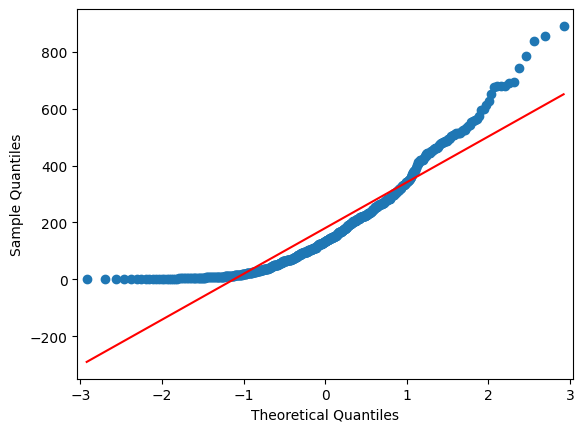

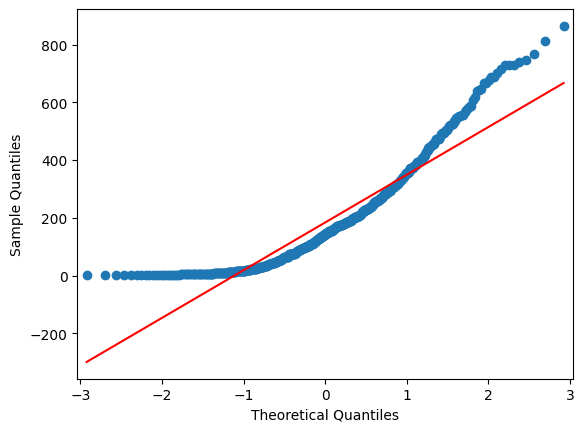

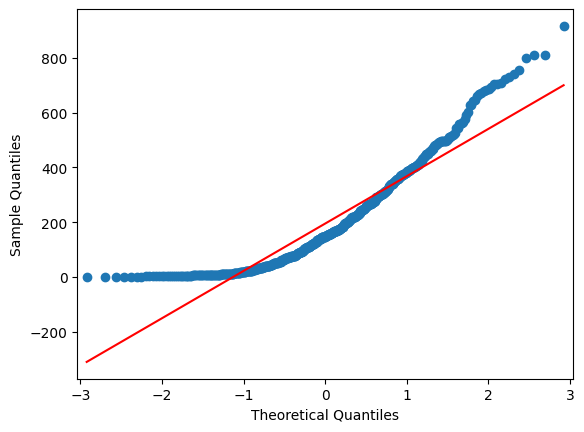

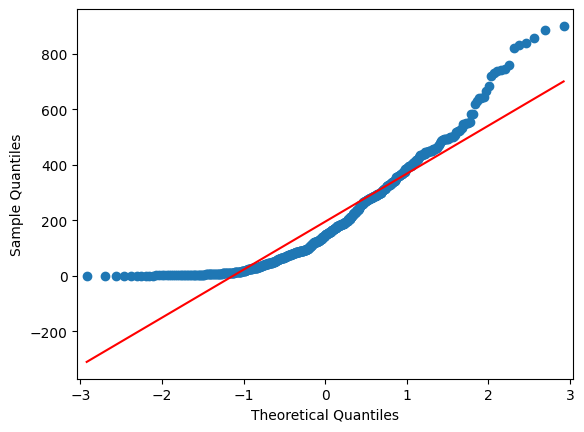

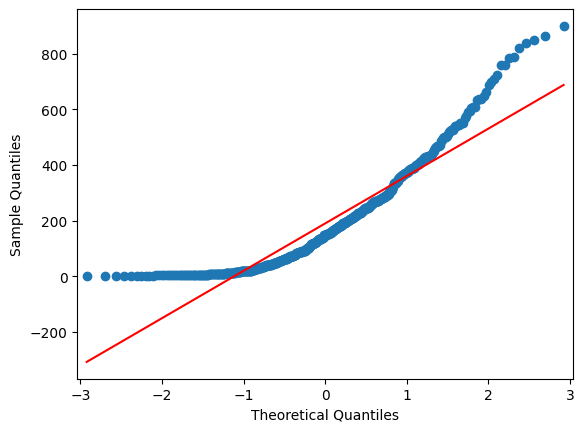

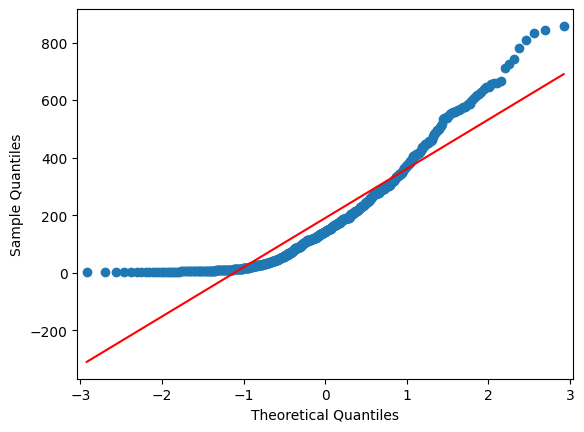

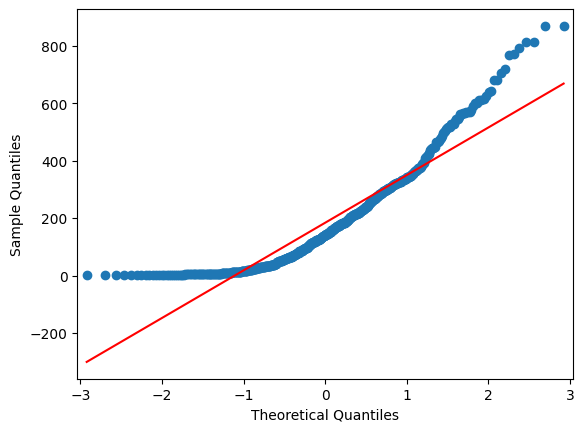

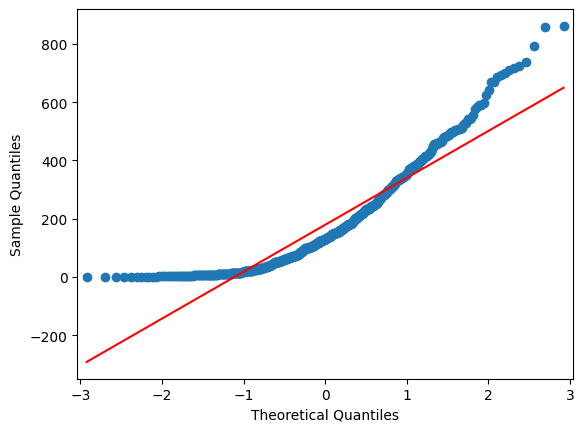

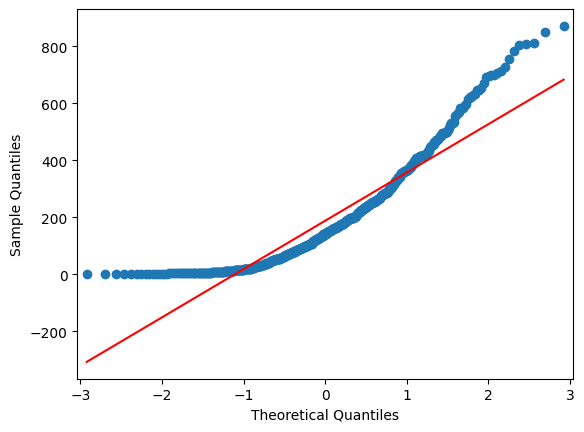

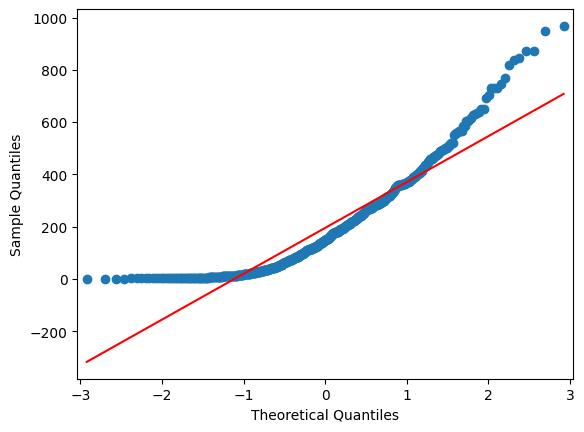

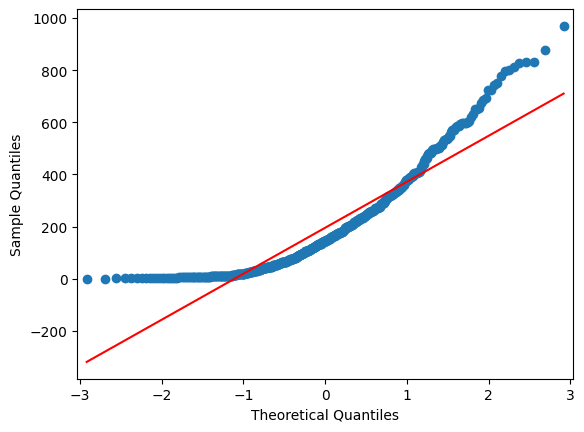

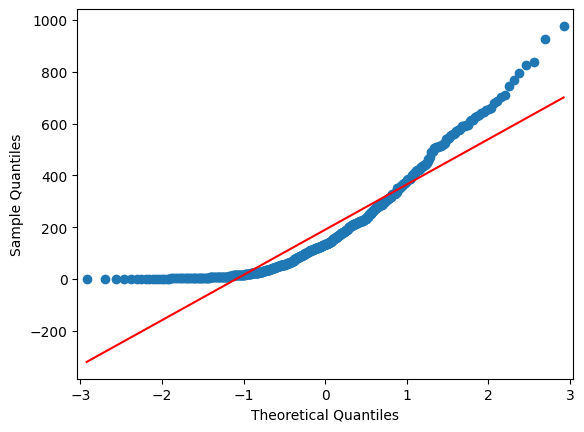

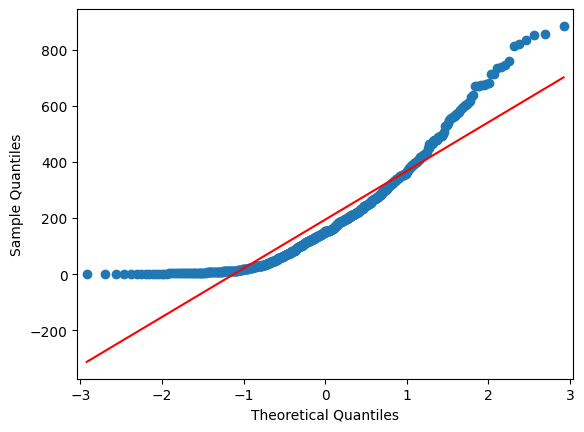

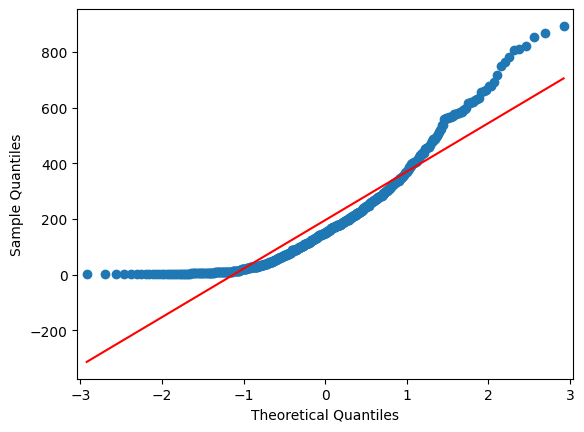

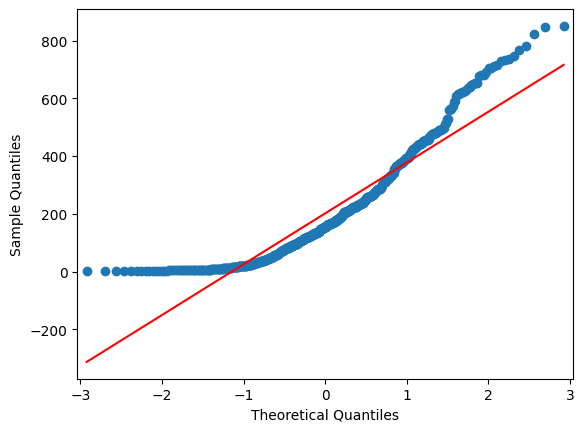

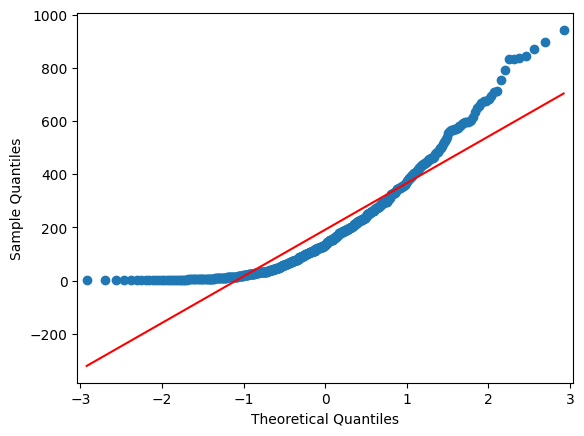

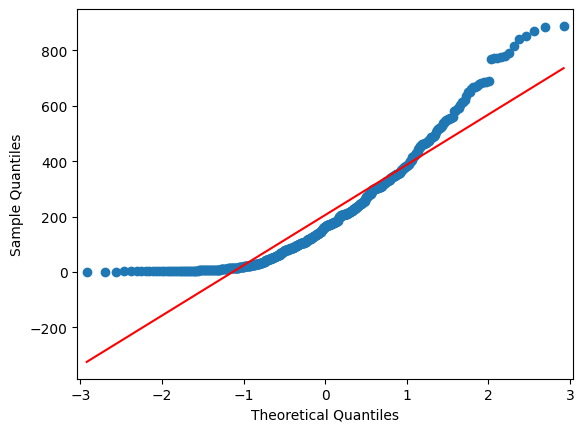

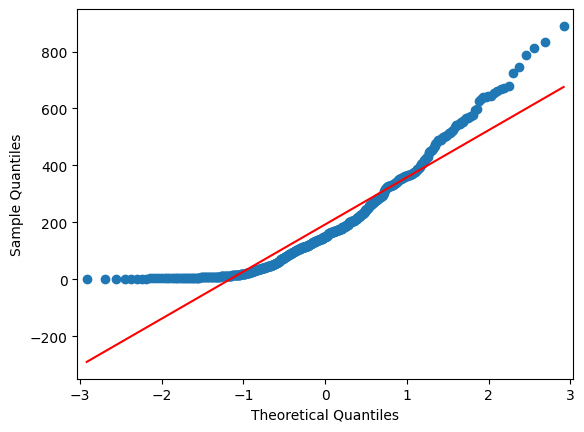

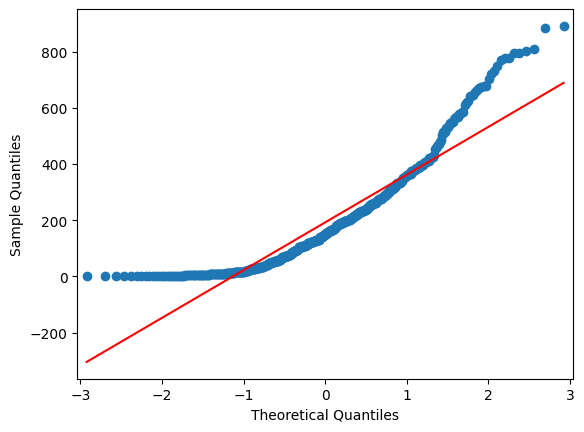

In [80]:
quantile_plot(df, 'count', 'day', log_transform = False)

Observations:
1. We can see that the 'count' data's distribution for each day are not Normally distributed. Hence we'll do a log transformation and verify if that changes the data into a Gaussian distribution.

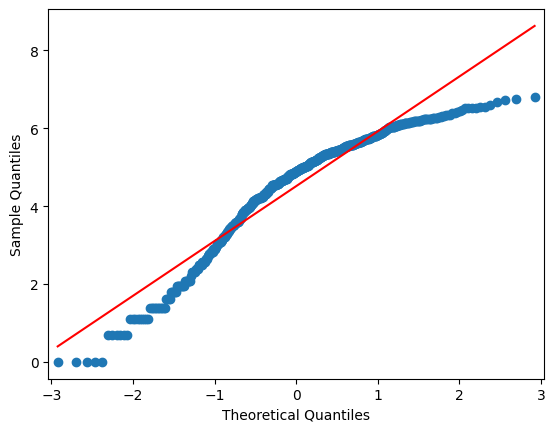

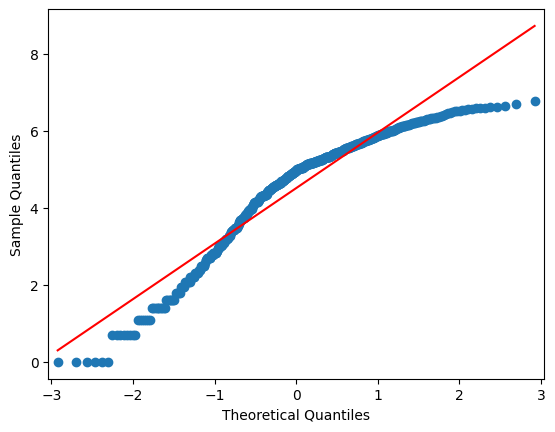

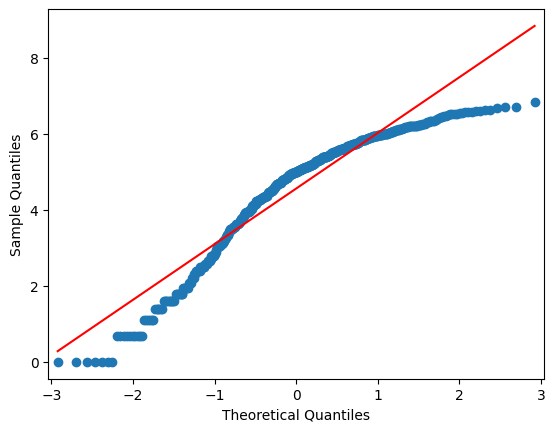

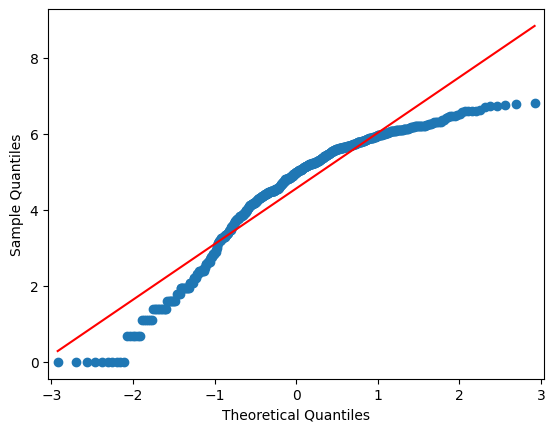

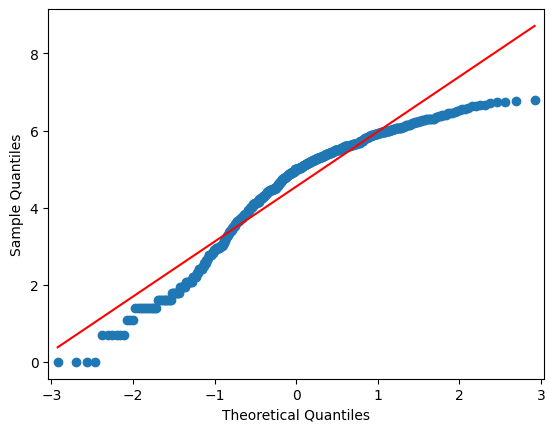

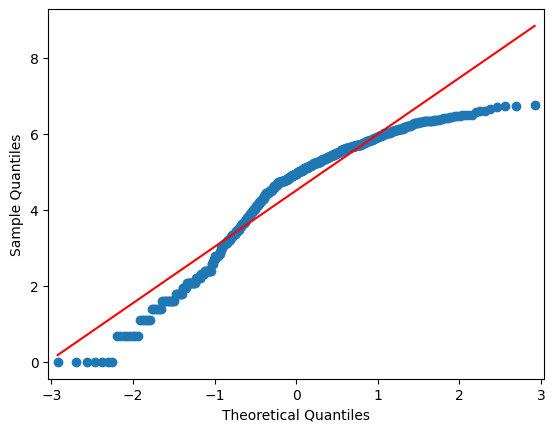

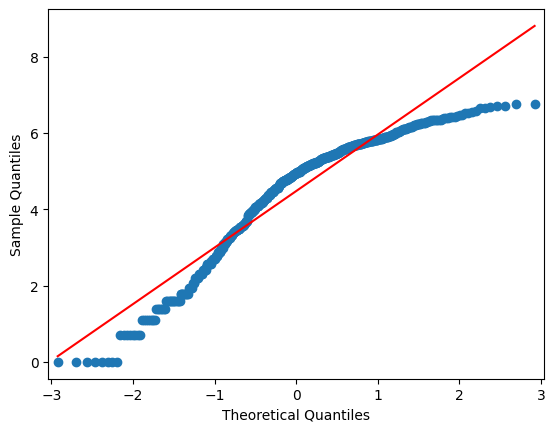

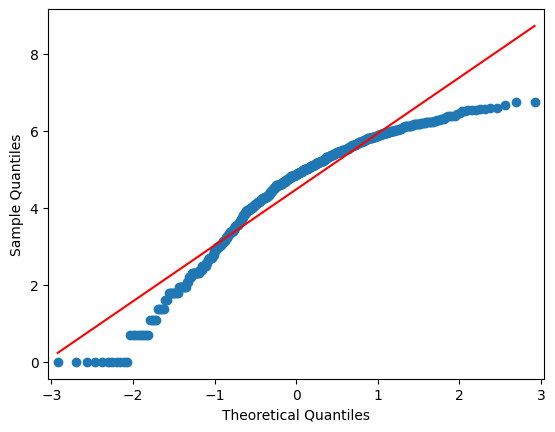

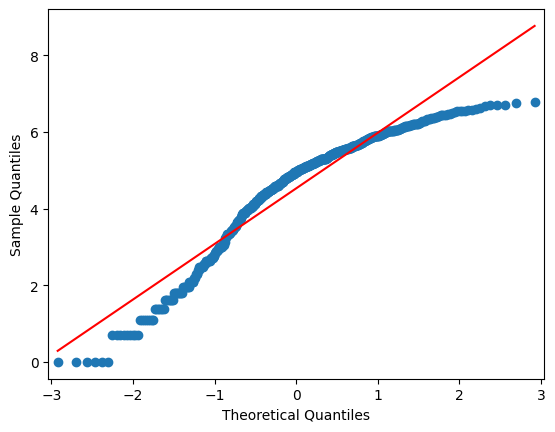

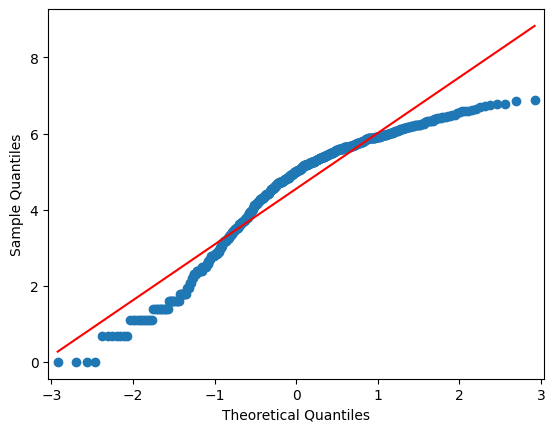

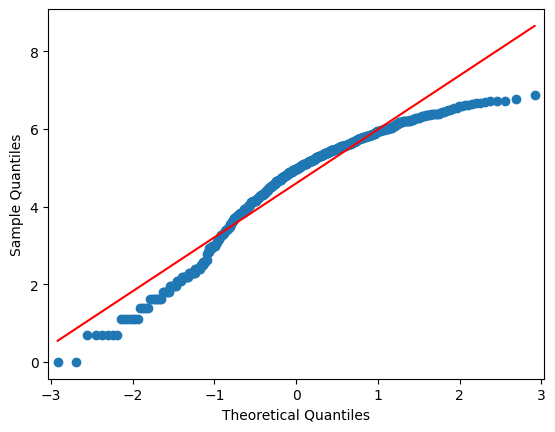

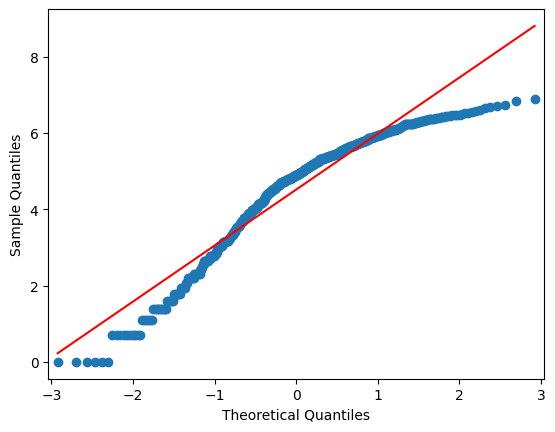

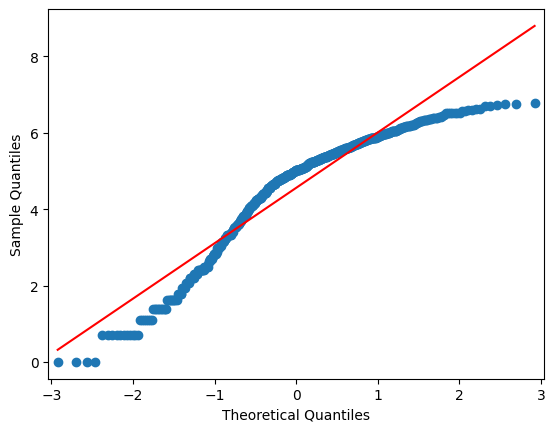

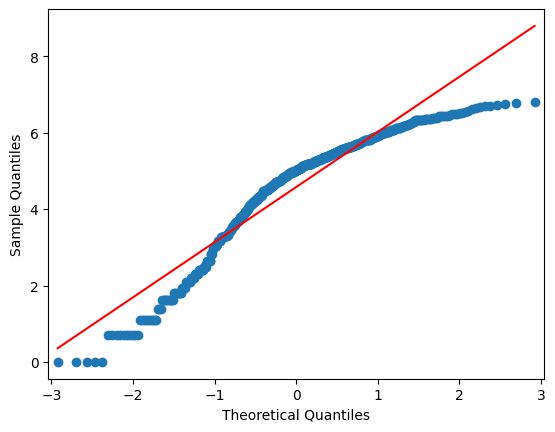

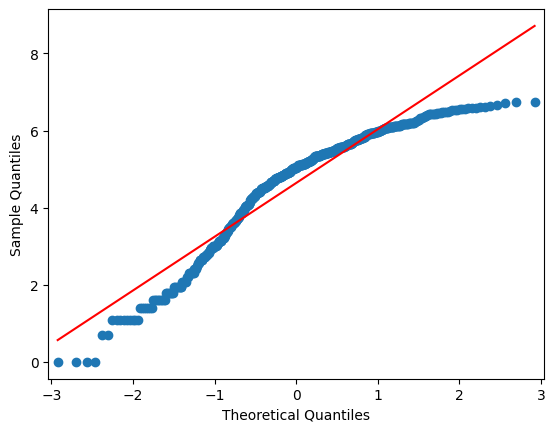

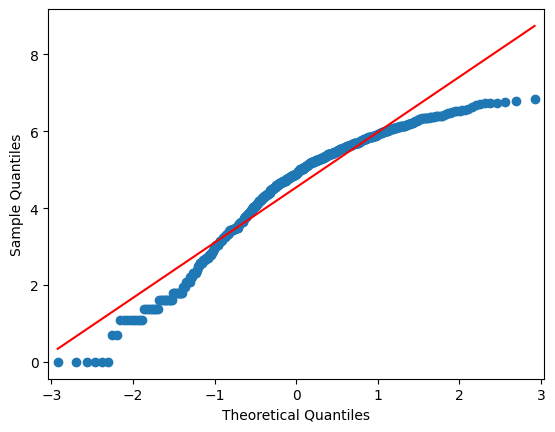

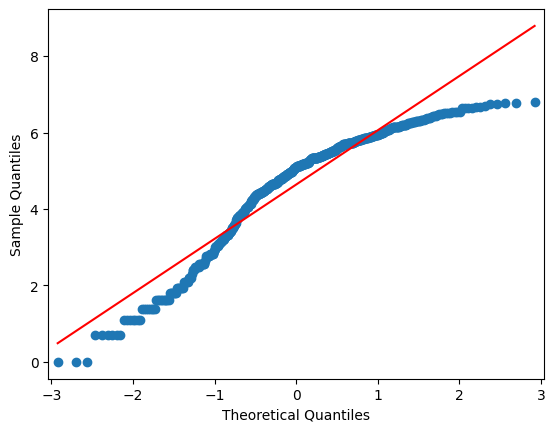

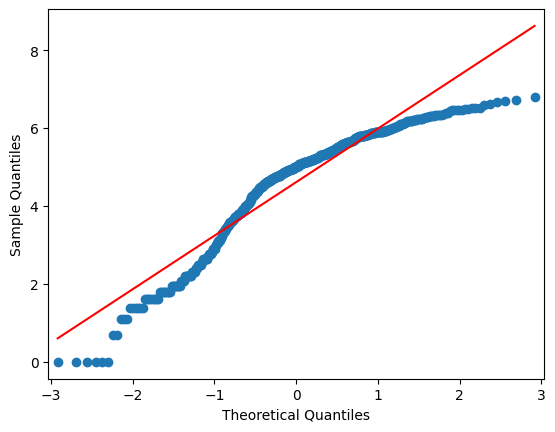

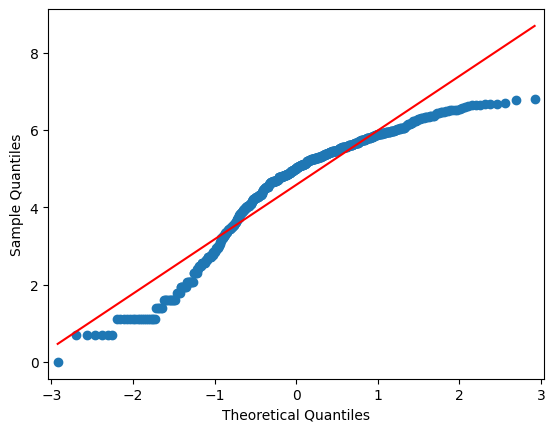

In [81]:
quantile_plot(df, 'count', 'day', log_transform = True)

Observations:
1. We can notice that the log transformation did not Normalize the distributions.

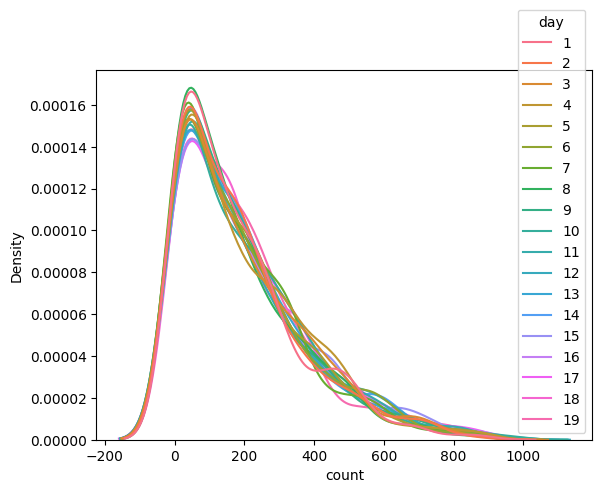

In [82]:
sns.kdeplot(data = df, x = 'count', hue = 'day')
plt.show()

Observations:
1. Although the distributions are right skewed, they are not log transformed data. Hence log transformation did not work. We will go with the Kruskal test results.
2. Based on the hypothesis test result using Kruskal Test, we can say that we do not have significant evidence to reject H0. We have failed to reject the null hypothesis. It means that the Median of number of rentals(count) on each day are the same.

###### holiday vs count

In [89]:
hypothesize(df, 'holiday', 'count')

Performing Hypothesis Testing on holiday vs count.
--------------------------------------------------
'holiday' is a category variable and 'count' is a int64 variable.
 There are 2 categories in holiday.
Hence performing T test's test of independence.

	    count
            average
holiday            
0        191.741655
1        185.877814

2 Sample T Test of independence
---------------------------------
Variance of 'count' variable for holiday = 0 is: 32943.901106481346
Variance of 'count' variable for holiday = 1 is: 28233.99150132856
    Null Hypothesis: The mean of 'count' variable for holiday = 0 is equal to the mean of count for holiday = 1.
    Alternative Hypothesis: The mean of count for holiday = 0 is greater than the mean of count for holiday = 1.

 The variance of the two groups are less than 1:4 ratio. Hence using standard independent 2 sample test
	T-Statistic: 0.5626388963477119
	p_value: 0.28684619416355517
    Conclusion:
	Failed to reject H0
	The mean of 'count' va

Observations:
1. Hypothesis testing between holiday and count feature. The 'holiday' is a categorical feature and 'count' is a numerical feature.
2. Since there are only 2 categories in the holiday feature, we will do a 2 sample t-test of independence.
3. The mean of count for holiday = 0 seem to be greater than the mean of count of holiday = 1.
4. The Null hypothesis is that the mean of 'count' variable for holiday = 0 is equal to the mean of count for holiday = 1. Alternative hypothesis is that the mean of count for holiday = 0 is greater than the mean of count for holiday = 1. This is because we are observing that the mean of count for holiday = 0 seem to be greater than the mean of count of holiday = 1.
5. The variance of the two groups are less than 1:4 ratio. Hence using the standard independent 2 sample test.
6. Based on the hypothesis test result using standard independent 2 sample t-test with p value:0.28684619416355517 , we can say that we do not have significant evidence to reject H0. We have failed to reject the null hypothesis. It means that the mean of 'count' variable for holiday = 0 and the mean of count variable for holiday = 1 are equal.
7. We can say that the holiday variable does not impact the count variable.

###### workingday vs count

In [98]:
hypothesize(df, 'workingday', 'count')

Performing Hypothesis Testing on workingday vs count.
--------------------------------------------------
'workingday' is a category variable and 'count' is a int64 variable.
 There are 2 categories in workingday.
Hence performing T test's test of independence.

	    count
               average
workingday            
0           188.506621
1           193.011873

2 Sample T Test of independence
---------------------------------
Variance of 'count' variable for workingday = 0 is: 30171.346098942427
Variance of 'count' variable for workingday = 1 is: 34040.69710674686
    Null Hypothesis: The mean of 'count' variable for workingday = 0 is equal to the mean of count for workingday = 1.
    Alternative Hypothesis: The mean of count for workingday = 0 is lesser than the mean of count for workingday = 1.

 The variance of the two groups are less than 1:4 ratio. Hence using standard independent 2 sample test
	T-Statistic: -1.2096277376026694
	p_value: 0.11322402113180674
    Conclusion:
	Fail

Observations:
1. Hypothesis testing between workingday and count feature. The 'workingday' is a categorical feature and 'count' is a numerical feature.
2. Since there are only 2 categories in the workingday feature, we will do a 2 sample t-test of independence.
3. The mean of count for workingday = 1 seem to be greater than the mean of count of workingday = 0.
4. The Null hypothesis is that the mean of 'count' variable for workingday = 0 is equal to the mean of count for workingday = 1. Alternative hypothesis is that the mean of count for workingday = 0 is lesser than the mean of count for workingday = 1. This is because we are observing that the mean of count for workingday = 1 seem to be greater than the mean of count of workingday = 0.
5. The variance of the two groups are less than 1:4 ratio. Hence using the standard independent 2 sample test.
6. Based on the hypothesis test result using standard independent 2 sample t-test with p value:0.11322402113180674 , we can say that we do not have significant evidence to reject H0. We have failed to reject the H0. It means that there is no significant evidence that the mean of 'count' variable for workingday = 0 is lesser than the mean of 'count' variable for workingday = 1.
7. We can say that the workingday variable does not impact the count variable.

###### season vs count

In [116]:
hypothesize(df, 'season', 'count')

Performing Hypothesis Testing on season vs count.
--------------------------------------------------
'season' is a category variable and 'count' is a int64 variable.
 There are 4 categories in season.
Hence considering ANOVA or Kruskal tests.

Checking Normality:
Performing Shapiro Wilk Test for Normality.
--------------------------------------------------
H0: The variable has a Normal distribution
Ha: The variable does not have a Normal distribution
	Test of Normality on count variable for sample with season = 1-->Shapiro test p value: 0.0 
	Conclusion:  Reject H0
	    We have evidence to say that the variable does not have a normal distribution.

Checking Variance:
Performing Levene Test to check variance.
--------------------------------------------------
H0: The variance between the groups within the distribution are equal.
Ha: The variance between the groups within the distribution are different.
checking variance in the count variable for groups in season.-->Levene Test p_value: 

Observations:
1. Hypothesis testing between season and count feature. The 'season' is a categorical feature and 'count' is a numerical feature.
2. Since there are more than 2 categories in the season feature, we will do a ANOVA or Kruskal test.
3. Testing the assumptions for ANOVA: Test of Normality with Shapiro Wilk test -> H0: The variable has a Normal distribution. Ha: The variable does not have a Normal distribution. We got a p value = 0. We rejected H0. We have evidence to say that the variable does not have a normal distribution.
4. Testing if the variances of each groups are equal with Levene test -> H0: The variance between the groups within the distribution are equal. Ha: The variance between the groups within the distribution are different. We got a p value = 1.0147116860043298e-118.We rejected H0. We have evidence to say that variance between the groups within the distribution are NOT equal.
5. Since ANOVA assumptions failed, we performed Kruskal Test.
6. For Kruskal test, the Null hypothesis is that the median of 'count' variable for all seasons are equal. Alternative hypothesis is that the median of count variable for all seasons are not equal.
7. Based on the hypothesis test result using Kruskal test with p value:2.479008372608633e-151 , we can say that we have significant evidence to reject H0. It means that there is significant evidence that the median of 'count' variable for at least one season is different from the median of count variable for the rest of the seasons.
8. We can say that the season variable does impact the count variable.
9. Since ANOVA assumptions failed, we performed ANOVA Test after log transforming the data.
10. For ANOVA test after log transformation, the Null hypothesis is that the average of 'count' variable for all seasons are equal. Alternative hypothesis is that the average of count variable for all seasons are not equal.
11. Based on the hypothesis test result using ANOVA test after log transformation, with p value:1.3071364586238865e-121 , we can say that we have significant evidence to reject H0. It means that there is significant evidence that the average of 'count' variable for at least one season is different from the average of count variable for the rest of the seasons.

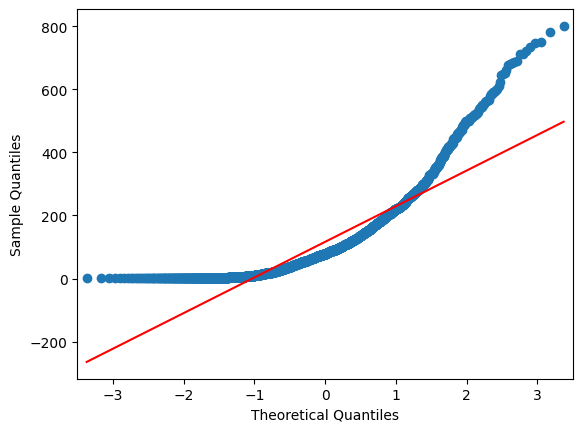

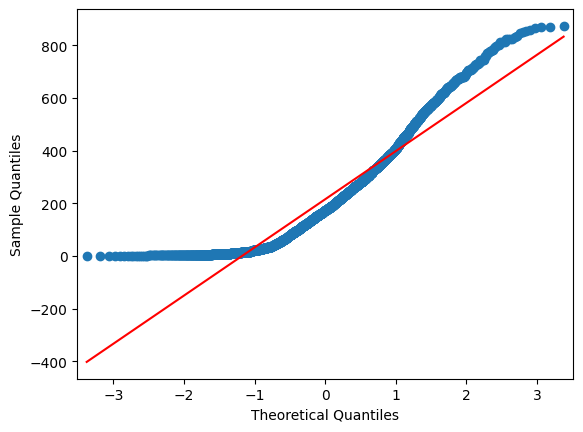

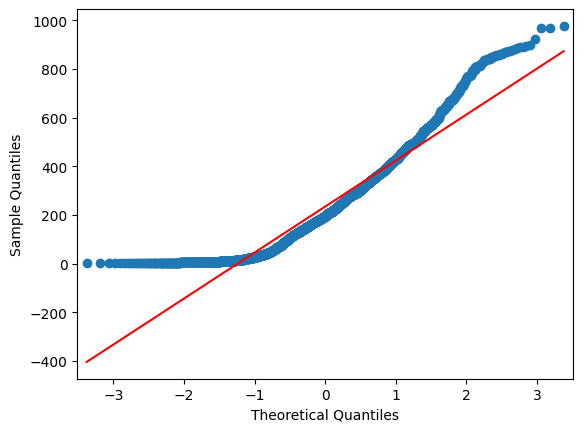

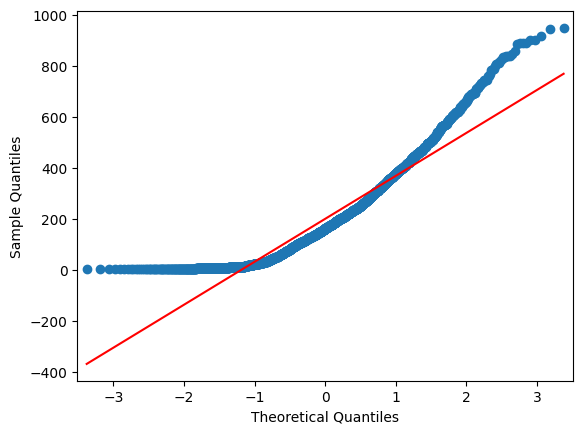

In [117]:
quantile_plot(df, 'count', 'season', log_transform = False)

Observations:
1. We can see that the qq plot shows that the count data for each season are not normally distributed.

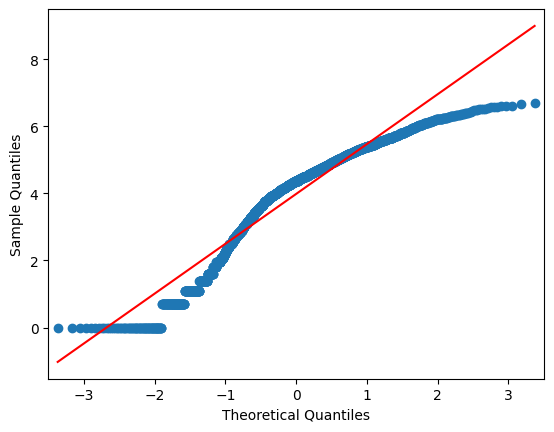

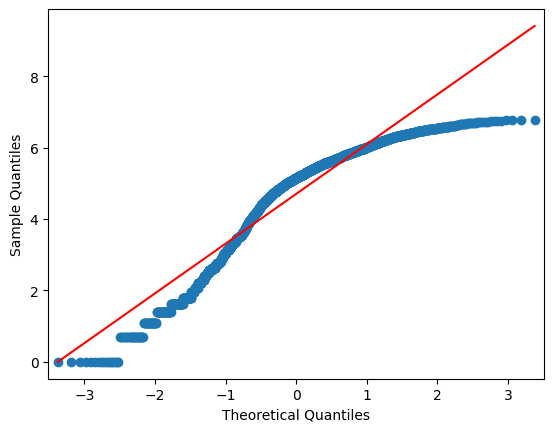

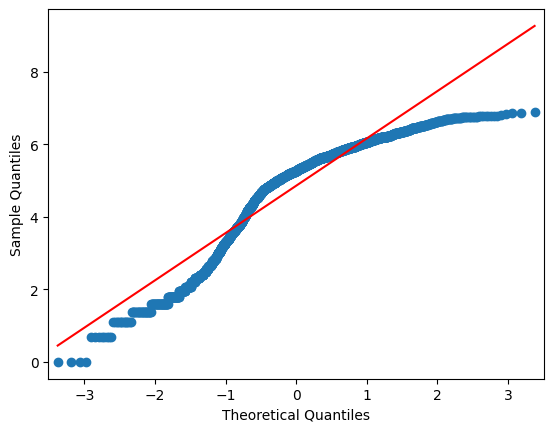

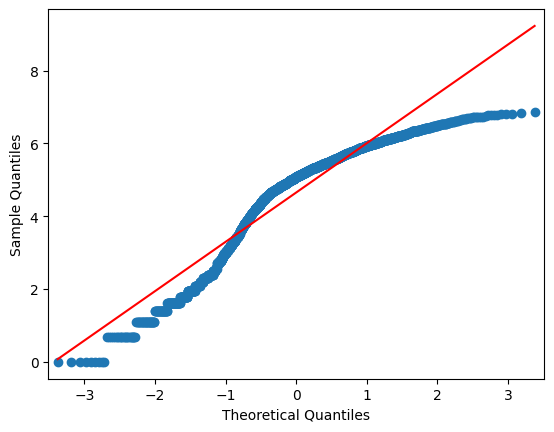

In [118]:
quantile_plot(df, 'count', 'season', log_transform = True)

Observations:
1. We can see that the qq plot shows that the log transformed count data for each season are also not normally distributed.

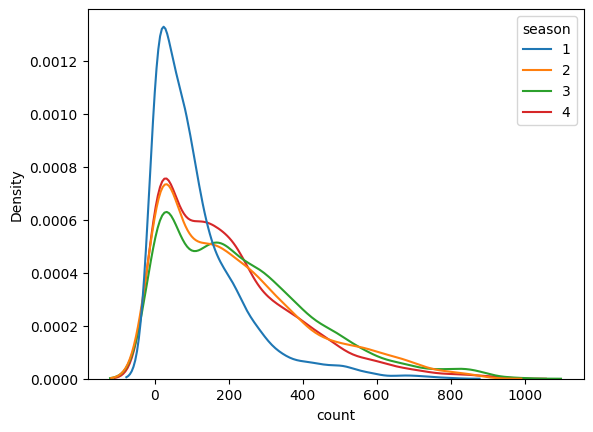

In [119]:
sns.kdeplot(data = df, x = 'count', hue = 'season')
plt.show()

Observations:
1. We can observe that the distribution of the count variable for each season is not log distributed. Hence log transformation did not work in transforming the data to a Gaussian distributed data.
2. We can accept the Kruskal test results.

###### weather vs count

In [127]:
hypothesize(df, 'weather', 'count')

Performing Hypothesis Testing on weather vs count.
--------------------------------------------------
'weather' is a category variable and 'count' is a int64 variable.
 There are 4 categories in weather.
Hence considering ANOVA or Kruskal tests.

Checking Normality:
Performing Shapiro Wilk Test for Normality.
--------------------------------------------------
H0: The variable has a Normal distribution
Ha: The variable does not have a Normal distribution
	Test of Normality on count variable for sample with weather = 1-->Shapiro test p value: 0.0 
	Conclusion:  Reject H0
	    We have evidence to say that the variable does not have a normal distribution.

Checking Variance:
Performing Levene Test to check variance.
--------------------------------------------------
H0: The variance between the groups within the distribution are equal.
Ha: The variance between the groups within the distribution are different.
checking variance in the count variable for groups in weather.-->Levene Test p_va

Observations:
1. Hypothesis testing between weather and count feature. The 'weather' is a categorical feature and 'count' is a numerical feature.
2. Since there are more than 2 categories in the weather feature, we will do a ANOVA or Kruskal test.
3. Testing the assumptions for ANOVA: Test of Normality with Shapiro Wilk test -> H0: The variable has a Normal distribution. Ha: The variable does not have a Normal distribution. We got a p value = 0. We rejected H0. We have evidence to say that the variable does not have a normal distribution.
4. Testing if the variances of each groups are equal with Levene test -> H0: The variance between the groups within the distribution are equal. Ha: The variance between the groups within the distribution are different. We got a p value = 3.504937946833238e-35. We rejected H0. We have evidence to say that variance between the groups within the distribution are NOT equal.
5. Since ANOVA assumptions failed, we performed Kruskal Test.
6. For Kruskal test, the Null hypothesis is that the median of 'count' variable for all weather are equal. Alternative hypothesis is that the median of count variable for all weather are not equal.
7. Based on the hypothesis test result using Kruskal test with p value:3.501611300708679e-44 , we can say that we have significant evidence to reject H0. It means that there is significant evidence that the median of 'count' variable for at least one weather is different from the median of count variable for the rest of the weather.
8. We can say that the weather variable does impact the count variable.
9. Since ANOVA assumptions failed, we performed ANOVA Test after log transforming the data.
10. For ANOVA test after log transformation, the Null hypothesis is that the average of 'count' variable for all weather are equal. Alternative hypothesis is that the average of count variable for all weather are not equal.
11. Based on the hypothesis test result using ANOVA test after log transformation, with p value:5.214500121600914e-32 , we can say that we have significant evidence to reject H0. It means that there is significant evidence that the average of 'count' variable for at least one weather is different from the average of count variable for the rest of the weather.

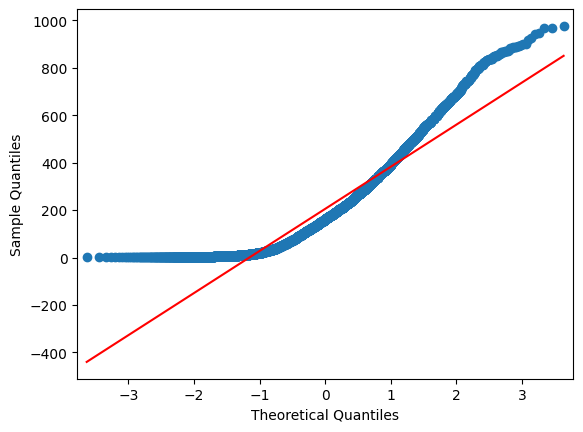

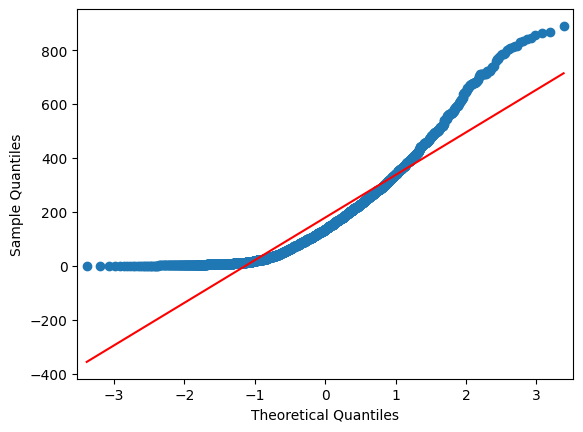

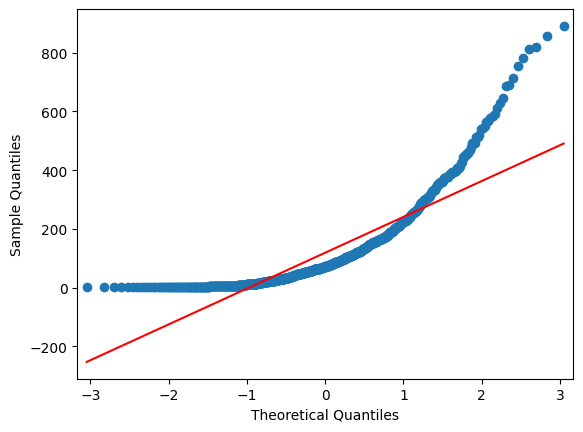

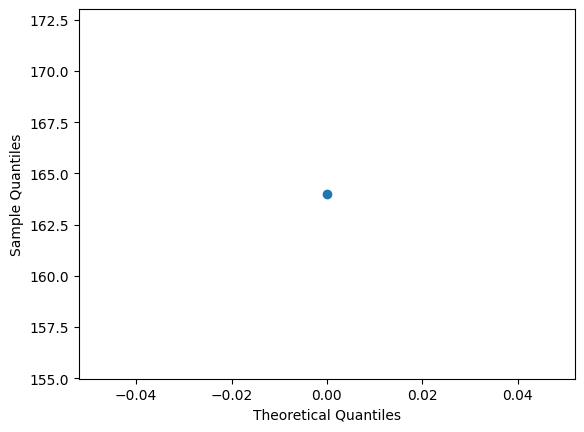

In [121]:
quantile_plot(df, 'count', 'weather', log_transform = False)

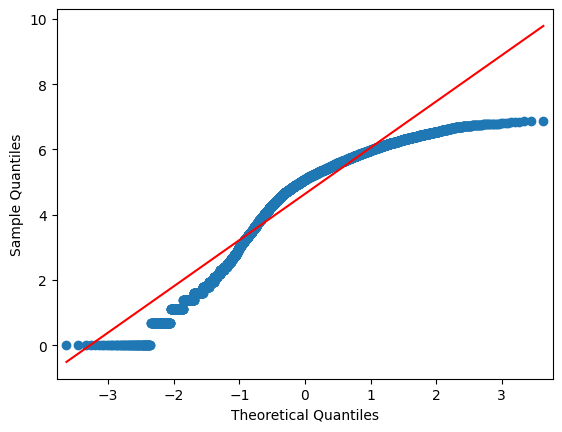

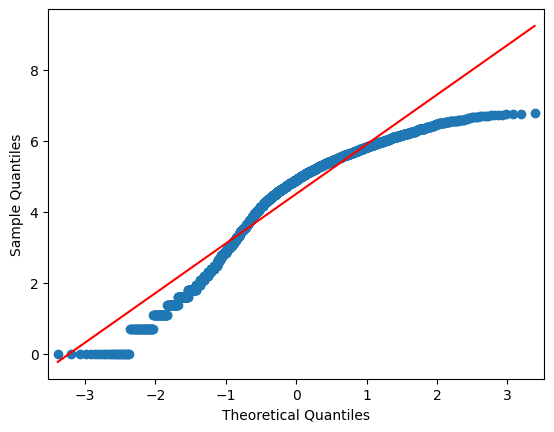

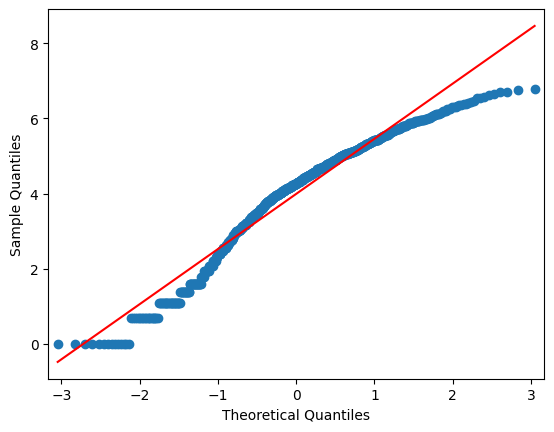

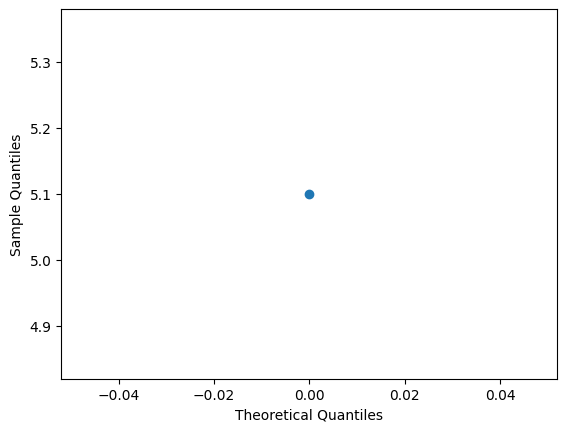

In [122]:
quantile_plot(df, 'count', 'weather', log_transform = True)

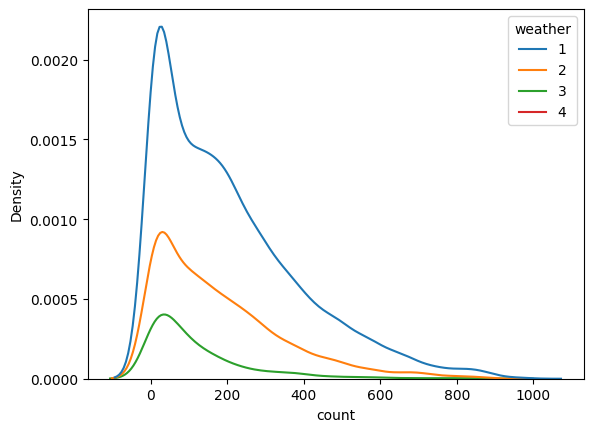

In [128]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')
plt.show()

Observations:
1. We can observe that the distribution of the count variable for each weather is not log distributed. Hence log transformation did not work in transforming the data to a Gaussian distributed data.
2. We can accept the Kruskal test results.

###### **********************************************************************************************************************************************************************

### Insights

#### General Analysis:
1. The dataset has 10886 records and 12 variables with no missing values.
2. There is one 'object' datatype variable named 'datetime'.
3. The 'season', 'holiday', 'workingday', 'weather', 'humidity', 'casual', 'registered' and 'count' are 'int64' type variables.
4. The 'temp', 'atemp' and 'windspeed' are 'float64' type variables.


#### Descriptive Statistics:
1. season: This variable indicates the season of the year, with values ranging from 1 to 4. The distribution is slightly left skewed, meaning that there are more observations with higher values (3 and 4) than lower values (1 and 2). This could imply that the bike rentals are more popular in spring and summer than in fall and winter.
2. holiday: This variable indicates whether the day is a holiday or not, with values of 0 or 1. The distribution is slightly right skewed, meaning that there are more observations with lower values (0) than higher values (1). This could imply that the bike rentals are less frequent on holidays than on regular days.
3. workingday: This variable indicates whether the day is a working day or not, with values of 0 or 1. The distribution is slightly left skewed, meaning that there are more observations with higher values (1) than lower values (0). This could imply that the bike rentals are more common on working days than on weekends/holidays.
4. weather: This variable indicates the weather condition of the day, with values ranging from 1 to 4. The distribution is slightly right skewed, meaning that there are more observations with lower values (1 and 2) than higher values (3 and 4). This could imply that the bike rentals are more affected by bad weather conditions such as rain, snow, or fog than by good weather conditions such as clear or cloudy.
5. temp: This variable indicates the temperature in Celsius, with values ranging from 0.82 to 41. The distribution is slightly left skewed, meaning that there are more observations with higher values than lower values. This could imply that the bike rentals are more influenced by warmer temperatures than by colder temperatures.
6. atemp: This variable indicates the feeling temperature in Celsius, with values ranging from 0.76 to 45.455. The distribution is slightly left skewed, meaning that there are more observations with higher values than lower values. This could imply that the bike rentals are more dependent on how people feel the temperature rather than on the actual temperature.
7. humidity: This variable indicates the humidity, with values ranging from 0 to 100. The distribution is slightly left skewed, meaning that there are more observations with higher values than lower values. This could imply that the bike rentals are more sensitive to higher humidity levels than to lower humidity levels.
8. windspeed: This variable indicates the wind speed, with values ranging from 0 to 56.9969. The distribution is slightly left skewed, meaning that there are more observations with higher values than lower values. This could imply that the bike rentals are more responsive to lower wind speeds than to higher wind speeds.
9. casual: This variable indicates the number of casual users who rented bikes on a given day, with values ranging from 0 to 367. The distribution is right skewed, meaning that there are more observations with lower values than higher values. There are days when the casual rentals are 0, meaning that no casual users rented bikes on those days. This could imply that the bike rentals by casual users are highly variable.
10. registered: This variable indicates the number of registered users who rented bikes on a given day, with values ranging from 0 to 886. The distribution is right skewed, meaning that there are more observations with lower values than higher values. There are days when the registered users’ rentals are 0, meaning that no registered users rented bikes on those days. This could imply that the bike rentals by registered users are also variable but less so than by casual users.
11. count: This variable indicates the total number of bike rentals on a given day, with values ranging from 1 to 977. The distribution is right skewed, meaning that there are more observations with lower values than higher values. There are no 0 rental days in the dataset, meaning that at least one bike is rented each day.

#### Univariate Analysis

##### datetime
1. The 'datetime' is a datetime variable with 10886 unique values.

##### season
1. There are 4 categories in the 'season' variable and have almost same number of records for all the four categories.

##### holiday
1. There are 2 categoried in the 'holiday' variable namely 0 and 1 and is heavily imbalanced with most of the records in the dataset for holiday variable is 0.
2. There are 10575 records in holiday = 0(non-holiday) and 311 records in holiday = 1(holidays).

##### workingday
1. There are 2 categories in the 'workingday' variable with most of the records in workingday = 1.

##### weather
1. There are 4 categories in the 'weather' variable namely 1,2,3 and 4 with most of the records in weather category = 1 and  followed by 2 and 3.
2. The category 4 has only one record.

##### temp
1. The 'temp' variable has 49 unique numerical values with multimodal distributions.

##### atemp
1. The 'atemp' variable has 60 unique numerical values with multimodal distributions.

##### humidity
1. The 'humidity' variable has 89 unique numerical values and they show a left skewed distribution.

##### windspeed
1. The 'windspeed' variable has 28 unique numerical values and have a right skewed distribution.

##### count
1. There are 2.76% of outliers in the count with the middle 50% of data lying between the values 42 and 284.
2. The median of 'count' variable is at 145.
3. The count values range from 1 to 977.

##### years and months
1. The dataset has data from years 2011 and 2012, months from Jan to Dec.
2. The dataset has data for only 1 to 19 days in each months.

#### Correlation Test
1. The 'count' variable appears to have positive correlations with 'registered', 'casual', 'temp', 'atemp', 'workingday' and 'season'.
2. The 'count' variable appears to have negative correlations with 'windspeed','weather', and 'holiday' variable.
3. The 'month' variable has a very strong correlation with the 'season' variable.
4. The 'count' variable has a very strong correlation with the 'registered' variable and followed by 'casual' variable.
5. The 'casual' variable has some correlation with the 'temp' and 'atemp' variables.
6. The 'windspeed' variable has some negative correlation with the 'humidity' variable.
7. The 'humidity' variable has some positive correlation with the 'weather' variable and has some negative correlation with the 'casual', 'windspeed' and the 'count' variable.
8. The 'atemp' variable has a very strong correlation with 'temp' followed by 'casual', 'count' and 'windspeed' variables.
9. 'temp' variable has positive correlation with 'casual', 'count' and 'registered'.
10. 'workingday' has negative correlation with 'casual' and 'holiday'.
11. 'day' variable does not have significant correlation with any other variables.

#### Bivariate Analysis
##### workignday vs count
1. There are 0.46% of outliers in count variable with respect to workingday = 0 group and 3.75% of outliers with respect to workignday = 1 group.
2. The median count value for workingday = 0 group is 128 and for workingday = 1 group it is 151.
3. The middle 50% values of count variable for workingday = 0 group lies between 44 and 304. The middle 50% values of count variable for workingday = 1 group lies between 41 and 277.
4. The values in count variable ranges from 1 to 783 for workingday = 0 group and 1 to 977 for workingday = 1.
5. The distribution of 'count' variable for workingday = 0 and workingday = 1 groups are almost similar.
6. The probability of for the people renting bikes on working days(workingday = 1) is higher than people renting bikes on non-working days(workingday = 0).
7. The number of people renting bikes seem to be slightly higher on working days.
8. The mean number of people renting during working days and non-working days seem to be pretty close to each other.
9. The confidence intervals of mean of the distribution of 'count' variable for working days and non-working days seem to overlap as per the barplot.

##### season vs count
1. There are 5.17% of outliers in count variable with respect to season = 1 group. There are 1.54% of outliers in the count variable with respect to season = 2 group.There are 2.23% of outliers in count variable with respect to season = 3 group. There are 2.34% of outliers in the count variable with respect to season = 4 group
2. The median count value for season = 1 group is 78 and the median count value for season = 2 group is 172.The median count value for season = 3 group is 195 and the median count value for season = 14 group is 161.
3. The middle 50% values of count variable for season = 1 group lies between 24 and 164. The middle 50% values of count variable for season = 2 group lies between 49 and 321. The middle 50% values of count variable for season = 3 group lies between 68 and 347. The middle 50% values of count variable for season = 4 group lies between 51 and 294.
4. The values in count variable ranges from 1 to 801 for season = 1 group and 1 to 873 for season = 2.The values in count variable ranges from 1 to 997 for season = 3 group and 1 to 948 for season = 4.
5. The distributions for 'count' varable for seasons 1, 2, 3 and 4 are right skewed.
6. The variance in the distribution of 'count' variable for season = 1 is lesser than the variance in the distribution of 'count' variables for seasons 2, 3 and 4.
7. The likelihood of less number of people renting bikes in season = 1 seem to be higher than the other seasons.
8. The likelihood of more number of people renting bikes is higher in season = 3 than the other seasons.
9. Season 3 has the highest average number of rentals followed by season 2, 4 and finally 1.
10. The average numner of rentals in Seasons 3, 2, 4 are closer than season 1.

##### weather vs count
1. There are 2.22% of outliers in count variable with respect to weather = 1 group. There are 2.22% of outliers in the count variable with respect to weather = 2 group.There are 6.52% of outliers in count variable with respect to weather = 3 group. There are 0% of outliers in the count variable with respect to weather = 4 group.
2. The median count value for weather = 1 group is 161 and the median count value for weather = 2 group is 134.The median count value for weather = 3 group is 71 and the median count value for weather = 14 group is 164.
3. The middle 50% values of count variable for weather = 1 group lies between 48 and 305. The middle 50% values of count variable for weather = 2 group lies between 41 and 264. The middle 50% values of count variable for weather = 3 group lies between 23 and 161. The middle 50% values of count variable for weather = 4 group lies between 164 and 164.
4. The values in count variable ranges from 1 to 977 for weather = 1 group and 1 to 890 for weather = 2.The values in count variable ranges from 1 to 891 for weather = 3 group and 164 for weather = 4.
5. weather 4 group has only one datapoint.
6. The distributions for 'count' varable for seasons 1, 2 and 3 are right skewed.
7. The variance in the distribution of 'count' variable for weather = 3 is lesser than the variance in the distribution of 'count' variables for weather 1 and 2.
8. The likelihood of less number of people renting bikes with weather = 1 seem to be higher than the other weathers.
9. The likelihood of more number of people renting bikes is higher in weather = 1 than the other weather.
10. The highest average number of bikes rented is in weather 1 followed by weather 2 and 3. Since there is only one datapoint for weather 4, there is no confidence interval shown.

##### weather vs season
1. It is observed that the season 1,2,3 and 4 have weather types 1,2 and 3. However, only the season 1 has the weather type 4.
2. The weather type 1 is mostly occuring in season 3 followed by season 2, 1 and 4.
3. The weather type 2 is mostly occuring in season 4 followed by 1, 2 and 3.
4. The weather type 3 is mostly occuring in season 2 followed by 4, 1 and 3.
5. Season 1 has all types of weathers(1,2,3 and 4). The highest average number of rentals season 1 is when the weather type is 1 followed by when the weather is 2 and 3. The weather type 4 occured only once but that has the highest number of rentals in season 1.
6. The highest average number of rentals season 2 is when the weather type is 1 followed by when the weather is 2 and 3.
7. The highest average number of rentals season 3 is when the weather type is 1 followed by when the weather is 2 and 3.
8. The highest average number of rentals season 4 is when the weather type is 1 followed by when the weather is 2 and 3.
9. People seem to like the combination of season 3 with weather type 1 and season 2 with weather type 1 the most which has the most highest and second highest average number of rentals.
10. The third highest average number of rentals are for the combination of season 3 and weather type 2 followed by season 4 and weather type 1.
11. Seasons 2, 3 and 4 with combination of weather 1 and 2 seem to be the most favorite for bike rentals.

#### Hypothesis Testing

##### workingday vs count
1. Hypothesis testing between workingday and count feature. The 'workingday' is a categorical feature and 'count' is a numerical feature. Since there are only 2 categories in the workingday feature, we will do a 2 sample t-test of independence.
2. The mean of count for workingday = 1 seem to be greater than the mean of count of workingday = 0.

        Null hypothesis: The mean of 'count' variable for workingday = 0 is equal to the mean of count for workingday.
        Alternative hypothesis: The mean of count for workingday = 0 is lesser than the mean of count for workingday = 1.
        
3. The variance of the two groups are less than 1:4 ratio. Hence used the standard independent 2 sample test.
4. Based on the hypothesis test result using standard independent 2 sample t-test with p value:0.11322402113180674 , 

        we can say that we do not have significant evidence to reject H0. We have failed to reject the H0. 
        It means that there is no significant evidence that the mean of 'count' variable for workingday = 0 is lesser than the mean of 'count' variable for workingday = 1.
        
    **CONCLUSION** We can say that the workingday variable does NOT impact the count variable.

##### season vs count
1. Hypothesis testing between season and count feature. The 'season' is a categorical feature and 'count' is a numerical feature. Since there are more than 2 categories in the season feature, we will do a ANOVA or Kruskal test.
2. Tested the assumptions for ANOVA: 
        
        Test of Normality with Shapiro Wilk test -> 
            H0: The variable has a Normal distribution. 
            Ha: The variable does not have a Normal distribution. 
            Conclusion: We got a p value = 0. We rejected H0. We have evidence to say that the variable does not have a normal distribution.
         
         Tested if the variances of each groups are equal with Levene test -> 
             H0: The variance between the groups within the distribution are equal. 
             Ha: The variance between the groups within the distribution are different. 
             Conclusion: We got a p value = 1.0147116860043298e-118.We rejected H0. We have evidence to say that variance between the groups within the distribution are NOT equal.
3. Since ANOVA assumptions failed, we performed Kruskal Test.
4. For Kruskal test: 

        Null hypothesis is that the median of 'count' variable for all seasons are equal. 
        Alternative hypothesis is that the median of count variable for all seasons are not equal.
5. Based on the hypothesis test result using Kruskal test with p value:2.479008372608633e-151 , 

        we can say that we have significant evidence to reject H0. 
        It means that there is significant evidence that the median of 'count' variable for at least one season is different from the median of count variable for the rest of the seasons.
        
7. Since ANOVA assumptions failed, we performed ANOVA Test after log transforming the data.
8. For ANOVA test after log transformation: 

        Null hypothesis is that the average of 'count' variable for all seasons are equal. 
        Alternative hypothesis is that the average of count variable for all seasons are not equal.
9. Based on the hypothesis test result using ANOVA test after log transformation, with p value:1.3071364586238865e-121 ,

        we can say that we have significant evidence to reject H0. 
        It means that there is significant evidence that the average of 'count' variable for at least one season is different from the average of count variable for the rest of the seasons.
     **CONCLUSION**. We can say that the season variable does impact the count variable.

##### weather vs count
1. Hypothesis testing between weather and count feature. The 'weather' is a categorical feature and 'count' is a numerical feature. Since there are more than 2 categories in the weather feature, we will do a ANOVA or Kruskal test.
2. Testing the assumptions for ANOVA: 

        Test of Normality with Shapiro Wilk test -> 
            H0: The variable has a Normal distribution. 
            Ha: The variable does not have a Normal distribution. 
            Conclusion: We got a p value = 0. We rejected H0. We have evidence to say that the variable does not have a normal distribution.

        Tested if the variances of each groups are equal with Levene test -> 
            H0: The variance between the groups within the distribution are equal. 
            Ha: The variance between the groups within the distribution are different. 
            Conclusion: We got a p value = 3.504937946833238e-35. We rejected H0. We have evidence to say that variance between the groups within the distribution are NOT equal.
            
3. Since ANOVA assumptions failed, we performed Kruskal Test.
4. For Kruskal test: 

        Null hypothesis is that the median of 'count' variable for all weather are equal. 
        Alternative hypothesis is that the median of count variable for all weather are not equal.

5. Based on the hypothesis test result using Kruskal test with p value:3.501611300708679e-44 , 
        
        we can say that we have significant evidence to reject H0. 
        It means that there is significant evidence that the median of 'count' variable for at least one weather is different from the median of count variable for the rest of the weather.

7. Since ANOVA assumptions failed, we performed ANOVA Test after log transforming the data.
8. For ANOVA test after log transformation:

        Null hypothesis is that the average of 'count' variable for all weather are equal. 
        Alternative hypothesis is that the average of count variable for all weather are not equal.
9. Based on the hypothesis test result using ANOVA test after log transformation, with p value:5.214500121600914e-32 , 

        we can say that we have significant evidence to reject H0. It means that there is significant evidence that the average of 'count' variable for at least one weather is different from the average of count variable for the rest of the weather.
    **CONCLUSION**: We can say that the weather variable does impact the count variable.

##### weather vs season
1. Hypothesis testing between season and weather feature. Both are categorical features.

        The Null hypothesis is that the season feature and weather feature are independent of each other. 
        Alternative hypothesis is that the season feature and weather feature have some dependency on each other.
2. Based on the hypothesis test result with p value = 1.549925073686492e-07, 
    
        we can say that we have significant evidence to reject H0.
    **CONCLUSION:**. There is evidence to say that there is some dependency between season and weather features.

###### **********************************************************************************************************************************************************************

### Recommendations

#### Based on the data analysis, here are some actionable recommendations for Yulu:
1. Casual users are very less and 'register' feature has good correlation with 'count'. Hence, Yulu can try to increase its registered customer base by providing some offers or discounts to people registrating and using the bikes for the first time.

2. **Workingday vs Count:** The data suggests that the probability of people renting bikes on working days is higher than on non-working days, and the number of people renting bikes seems to be slightly higher on working days. However, the mean number of people renting during working days and non-working days seems to be pretty close to each other, and the confidence intervals of the mean of the distribution of ‘count’ variable for working days and non-working days seem to overlap. Therefore, Yulu may not need to adjust their supply of bikes significantly based on whether it is a working day or not.

2. **Season vs Count:** The data suggests that the likelihood of less number of people renting bikes in season 1 is higher than in other seasons, while the likelihood of more number of people renting bikes is higher in season 3 than in other seasons. Season 3 has the highest average number of rentals followed by season 2, 4, and finally 1. Therefore, Yulu should consider adjusting their supply of bikes based on the season. For instance, if fewer bikes are rented in season 1, Yulu could decrease their supply during that season to avoid excess inventory, while if more bikes are rented in season 3, Yulu could increase their supply during that season to meet the demand.

        Seasons:
        1: spring 
        2: summer
        3: fall
        4: winter.

3. **Weather vs Count:** The data suggests that the likelihood of less number of people renting bikes is higher with weather = 1 than other weather conditions, and the likelihood of more number of people renting bikes is higher in weather = 1 than other weather conditions. The highest average number of bikes rented is in weather 1 followed by weather 2 and 3. Therefore, Yulu should consider adjusting their supply of bikes based on the weather. For instance, if fewer bikes are rented in certain weather conditions, Yulu could decrease their supply during those conditions to avoid excess inventory, while if more bikes are rented in certain weather conditions, Yulu could increase their supply during those conditions to meet the demand.

        weather:
        1: Clear, Few clouds, partly cloudy, partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

4. **Weather vs Season:** The data suggests that people seem to like the combination of season 3 with weather type 1 and season 2 with weather type 1 the most which has the most highest and second highest average number of rentals. The third highest average number of rentals are for the combination of season 3 and weather type 2 followed by season 4 and weather type 1. Seasons 2, 3 and 4 with combination of weather 1 and 2 seem to be the most favorite for bike rentals. Therefore, Yulu should consider adjusting their supply of bikes based on both the season and the weather. For instance, if more bikes are rented in certain combinations of seasons and weather conditions, Yulu could increase their supply during those combinations to meet the demand.

#### Based on the hypothesis testing results, here are some actionable recommendations for Yulu:
1. **Workingday vs Count:** The hypothesis test results suggest that the ‘workingday’ feature does not significantly impact the ‘count’ feature. This implies that the number of bikes rented does not significantly differ between working days and non-working days. Therefore, Yulu may not need to adjust their supply of bikes based on whether it is a working day or not.
2. **Season vs Count:** The hypothesis test results indicate that the ‘season’ feature does significantly impact the ‘count’ feature. This suggests that the number of bikes rented varies across different seasons. Therefore, Yulu should consider adjusting their supply of bikes based on the season. For instance, if more bikes are rented in a particular season, Yulu could increase their supply during that season to meet the demand.
3. **Weather vs Count:** The hypothesis test results suggest that the ‘weather’ feature does significantly impact the ‘count’ feature. This implies that the number of bikes rented varies with different weather conditions. Therefore, Yulu should consider adjusting their supply of bikes based on the weather. For instance, if fewer bikes are rented in a particular weather condition, Yulu could decrease their supply during that weather condition to avoid excess inventory.
4. **Weather vs Season:** The hypothesis test results indicate that there is some dependency between the ‘season’ and ‘weather’ features. This suggests that the weather conditions vary across different seasons. Therefore, Yulu should take into account the relationship between season and weather when making decisions related to bike supply.

###### **********************************************************************************************************************************************************************